# Chapter 4: Iconicity and Portfolio Careers Questions
Some simple, one or two a little harder, for the Iconicity and Portfolio Careers chapter.
I’ve tried to keep it basic but it’s an analysis-heavy chapter so I want to make it as
robust as I can. Feel free to contact Nat if you have any questions about it; wherever
he’s I’ve connected the questions to where the partial information exists in the text
already, so he’s attached the current draft for reference.

## Definitions/Really Quick Questions

In [129]:
# for data mgmt
import pandas as pd
import requests

import warnings
warnings.filterwarnings("ignore")

def fetch_small_data_from_github(fname):
    url = f"https://raw.githubusercontent.com/acd-engine/jupyterbook/master/data/analysis/{fname}"
    if 'xlsx' in fname: return pd.read_excel(url)
    else:
        response = requests.get(url)
        rawdata = response.content.decode('utf-8')
        return pd.read_csv(io.StringIO(rawdata))


acde_people = pd.read_csv('data/acde_person.csv')
daao_people = acde_people[acde_people.data_source.str.contains('DAAO')]
# del acde_people

circus_oz_people = fetch_small_data_from_github('CircusOz.xlsx')
circus_oz_people = circus_oz_people[~circus_oz_people['PERSON.NUMBER'].isnull()] # remove redundant rows
endcol = 'VENUE_(TBC)'

# assign event number to each related person
for idx,row in circus_oz_people.iterrows():
    if pd.isnull(row['EVENT.NUMBER']): 
        for col, val in row_dict.items(): circus_oz_people.at[idx, col] = val
    else: 
        row_dict = row.loc["EVENT.NUMBER":endcol].to_dict()

#### What percentile is George Gittoes in DAAO by having six roles? (Page 19)

In [84]:
import ast

career_count_ls = []

# First, reset your dictionary creation
for index, row in daao_people.iterrows():
    id = row["_id"]
    # Instead of storing DataFrames, normalize data with an id column
    if isinstance(row.career, str):
        try:
            career_data = ast.literal_eval(row.career)
            if career_data:  # Only process if there's actual data
                df = pd.json_normalize(career_data)
                career_count = len(career_data["career_periods"])
                career_count_ls.append(career_count)
        except (ValueError, SyntaxError):
            # Handle cases where ast.literal_eval fails
            pass

# Convert the list to a DataFrame
role_count = pd.DataFrame(career_count_ls, columns=["role_count"]).value_counts().reset_index().rename(columns={0: "count"})

# Calculate the percentile of George Gittoes
george_roles = 6
total_artists = role_count["count"].sum()

# Cumulative count of artists with role counts ≤ 6
cumulative_count = role_count[role_count["role_count"] <= george_roles]["count"].sum()

# Compute percentile
percentile = (cumulative_count / total_artists) * 100

print(f"George Gittoes is in the {percentile:.2f}th percentile of artists by role count.")

George Gittoes is in the 97.97th percentile of artists by role count.


#### What is the year range/s for Laurel Frank, David Murray, and Tim Coldwell’s
involvement with Circus Oz? (Pages 25-26)

In [131]:
laurel_frank = circus_oz_people[circus_oz_people["COMBINED.NAME"].str.contains("Laurel Frank")]
david_murray = circus_oz_people[circus_oz_people["COMBINED.NAME"].str.contains("David Murray")]
tim_coldwell = circus_oz_people[circus_oz_people["COMBINED.NAME"].str.contains("Tim Coldwell")]

# what are the year ranges of the events that Laurel Frank, David Murray, and Tim Coldwell participated in?
# this is the format of the date columns: 1977-06-01 00:00:00
laurel_frank_event_start_data = laurel_frank["DATE.FROM.(General)"].astype(str).str[:4].astype(int)
laurel_frank_event_end_data = laurel_frank["DATE.TO.(General)"].astype(str).str[:4].astype(int)

david_murray_event_start_data = david_murray["DATE.FROM.(General)"].astype(str).str[:4].astype(int)
david_murray_event_end_data = david_murray["DATE.TO.(General)"].astype(str).str[:4].astype(int)

tim_coldwell_event_start_data = tim_coldwell["DATE.FROM.(General)"].astype(str).str[:4].astype(int)
tim_coldwell_event_end_data = tim_coldwell["DATE.TO.(General)"].astype(str).str[:4].astype(int)

# first lets store the start and end years of the career
laurel_frank_start_year = laurel_frank_event_start_data.min()
laurel_frank_end_year = laurel_frank_event_end_data.max()

david_murray_start_year = david_murray_event_start_data.min()
david_murray_end_year = david_murray_event_end_data.max()

tim_coldwell_start_year = tim_coldwell_event_start_data.min()
tim_coldwell_end_year = tim_coldwell_event_end_data.max()

print(f"Laurel Frank's Circus Oz career spanned from {laurel_frank_start_year} to {laurel_frank_end_year} ({laurel_frank_end_year - laurel_frank_start_year} years).")
print(f"David Murray's Circus Oz career spanned from {david_murray_start_year} to {david_murray_end_year} ({david_murray_end_year - david_murray_start_year} years).")
print(f"Tim Coldwell's Circus Oz career spanned from {tim_coldwell_start_year} to {tim_coldwell_end_year} ({tim_coldwell_end_year - tim_coldwell_start_year} years).")

# We shouldnt assume that the career is constant, we need to find which years they werent active
# Find the years that each artist was not active
laurel_frank_inactive_years = set(range(laurel_frank_start_year, laurel_frank_end_year + 1)) - set(laurel_frank_event_start_data) - set(laurel_frank_event_end_data)
david_murray_inactive_years = set(range(david_murray_start_year, david_murray_end_year + 1)) - set(david_murray_event_start_data) - set(david_murray_event_end_data)
tim_coldwell_inactive_years = set(range(tim_coldwell_start_year, tim_coldwell_end_year + 1)) - set(tim_coldwell_event_start_data) - set(tim_coldwell_event_end_data)

# if laurel_frank_inactive_years is empty, print "Laurel Frank was active every year."
laurel_frank_inactive_years = "n/a" if not laurel_frank_inactive_years else laurel_frank_inactive_years
david_murray_inactive_years = "David Murray was active every year." if not david_murray_inactive_years else david_murray_inactive_years
tim_coldwell_inactive_years = "n/a" if not tim_coldwell_inactive_years else tim_coldwell_inactive_years

# Print the results
print("")
print(f"Laurel Frank was not active in the following years: {laurel_frank_inactive_years}")
print(f"David Murray was not active in the following years: {david_murray_inactive_years}")
print(f"Tim Coldwell was not active in the following years: {tim_coldwell_inactive_years}")

Laurel Frank's Circus Oz career spanned from 1977 to 2006 (29 years).
David Murray's Circus Oz career spanned from 1986 to 2007 (21 years).
Tim Coldwell's Circus Oz career spanned from 1977 to 2010 (33 years).

Laurel Frank was not active in the following years: n/a
David Murray was not active in the following years: {1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001}
Tim Coldwell was not active in the following years: n/a


#### Count of people mentioned across DAAO, DAQA, and AusStage, or a combination of the two

*Note: We determine this by cross-checking with Display Name in each source.*

In [153]:
# display_name_source_count = pd.crosstab(acde_people["display_name"], acde_people["data_source"])

# change the column names
display_name_source_count.columns = display_name_source_count.columns.str.replace('"DAAO"', "DAAO")
display_name_source_count.columns = display_name_source_count.columns.str.replace('"DAQA"', "DAQA")
display_name_source_count.columns = display_name_source_count.columns.str.replace('"AusStage"', "AusStage")
display_name_source_count = display_name_source_count[['DAAO', 'DAQA', 'AusStage']]

# if artist has been in DAAO, DAQA, and AusStage, CREATE a new column called "all_sources" and set it to 1
display_name_source_count["all_sources"] = display_name_source_count[["DAAO", "DAQA", "AusStage"]].min(axis=1)

# if an artist has been in DAAO and DAQA, CREATE a new column called "daao_daqa" and set it to 1
display_name_source_count["daao_daqa"] = display_name_source_count[["DAAO", "DAQA"]].min(axis=1)

# if an artist has been in DAAO and AusStage, CREATE a new column called "daao_ausstage" and set it to 1
display_name_source_count["daao_ausstage"] = display_name_source_count[["DAAO", "AusStage"]].min(axis=1)

# if an artist has been in DAQA and AusStage, CREATE a new column called "daqa_ausstage" and set it to 1
display_name_source_count["daqa_ausstage"] = display_name_source_count[["DAQA", "AusStage"]].min(axis=1)

print(f"There are {display_name_source_count['all_sources'].sum()} artists that have been in all three sources.")
print(f"There are {display_name_source_count['daao_daqa'].sum()} artists that have been in DAAO and DAQA.")
print(f"There are {display_name_source_count['daao_ausstage'].sum()} artists that have been in DAAO and AusStage.")
print(f"There are {display_name_source_count['daqa_ausstage'].sum()} artists that have been in DAQA and AusStage.")

There are 22 artists that have been in all three sources.
There are 59 artists that have been in DAAO and DAQA.
There are 2553 artists that have been in DAAO and AusStage.
There are 105 artists that have been in DAQA and AusStage.


## Statistics (Please include tabular data for those currently represented by visualisations, so that I can quote precise numbers in the text – we might replace some visualisations)
- Can we run all the following analyses on a) all AusStage people, b) all AusStage
people over 5 events, c) AusStage 253? Also break down each by gender.
- Average number of roles per person
- Number of roles bar chart (Figure 1)
- Breakdown of roles (Actor, Director, etc.) with number of participations and
percentage of people with each role (Table 4)

### AusStage

Can we run all the following analyses on a) all AusStage people, b) all AusStage people over 5 events, c) AusStage 253? Also break down each by gender.

In [214]:
ausstage_persons = acde_people[acde_people.data_source.str.contains('AusStage')]
ausstage_persons['ori_id'] = ausstage_persons.ori_id.astype(int)
ausstage_253 = fetch_small_data_from_github('AusStage253.xlsx')
ausstage_253_cols = ['original_id','state','birth_place','birth_date_yyyy','death_place','death_date_yyyy']

ausstage_253_merged = pd.merge(ausstage_persons, ausstage_253[ausstage_253_cols], left_on='ori_id', 
                               right_on='original_id', how='right')

del ausstage_253

In [ ]:
acde_event = pd.read_csv('data/acde_event.csv')
ausstage_event = acde_event[acde_event.data_source.str.contains('AusStage')]

#### Career length

*Note: We assume career length, by subtracting the end year of the last event of a person and the start year of the first event*

In [375]:
# import json

# people_with_event_years = pd.DataFrame()

# # takes 5 mins
# for idx, event in ausstage_event.iterrows():
#     if isinstance(event.coverage_ranges, str):
#         event_start = None
#         event_end = None
#         coverange_ranges = pd.json_normalize(ast.literal_eval(event.coverage_ranges))
#         if "date_range.date_start.year" in coverange_ranges.columns:
#             event_start = int(coverange_ranges["date_range.date_start.year"].values[0])
#         if "date_range.date_end.year" in coverange_ranges.columns:
#             event_end = int(coverange_ranges["date_range.date_end.year"].values[0])

#         if isinstance(event.related_people, str):
#             related_people = pd.json_normalize(json.loads(event.related_people))[["subject.ori_id"]].drop_duplicates()
#             related_people["event_start"] = event_start
#             related_people["event_end"] = event_end
#             people_with_event_years = pd.concat([people_with_event_years, related_people])

# # output the results
# people_with_event_years.to_csv("data/ausstage_people_with_event_years.csv", index=False)

people_with_event_years = pd.read_csv('data/ausstage_people_with_event_years.csv')
people_with_event_years_gender = pd.merge(people_with_event_years, ausstage_persons[["ori_id","gender"]], left_on='subject.ori_id', 
                               right_on='ori_id', how='left')
people_with_event_years_gender.gender = people_with_event_years_gender.gender.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

def get_career_lengths(df, gender=None):
    gender_str = ""
    if gender == "Male":
        df = df[df.gender.str.contains("Male", na=False)]
        gender_str = ", Male"
    if gender == "Female":
        df = df[df.gender.str.contains("Female", na=False)]
        gender_str = ", Female"

    # find the event_start min and event_end max for each person
    people_with_event_years_grouped = df.groupby("subject.ori_id").agg(
        event_start_min=("event_start", "min"),
        event_end_max=("event_end", "max"),
        last_event_start=("event_start", "max"),
        # add count of events
        event_count=("event_start", "count")
    ).reset_index()

    # some events do not have an event_end, so assign the max between the last event start and the event end max to the event end
    people_with_event_years_grouped["event_end_max"] = people_with_event_years_grouped[["event_end_max", "last_event_start"]].max(axis=1)
    people_with_event_years_grouped["career_length"] = (people_with_event_years_grouped["event_end_max"] - people_with_event_years_grouped["event_start_min"])+1

    # drop column
    people_with_event_years_grouped.drop(columns=["last_event_start"], inplace=True)

    people_with_at_least_5_events = people_with_event_years_grouped[people_with_event_years_grouped["event_count"] >= 5]
    people_in_the_253 = people_with_event_years_grouped[people_with_event_years_grouped["subject.ori_id"].isin(ausstage_253_merged.ori_id)]

    print(f"AusStage, All{gender_str}:")
    display(pd.DataFrame(people_with_event_years_grouped["career_length"].describe()).T)

    print(f"AusStage, At Least 5 Events{gender_str}:")
    display(pd.DataFrame(people_with_at_least_5_events["career_length"].describe()).T)

    print(f"AusStage, AusStage 253{gender_str}:")
    display(pd.DataFrame(people_in_the_253["career_length"].describe()).T)

    return people_with_event_years_grouped, people_with_at_least_5_events[["subject.ori_id"]], people_in_the_253[["subject.ori_id"]]

In [376]:
people_with_event_years_grouped, event5_ids, people253_ids = get_career_lengths(df=people_with_event_years_gender)
print("---------------------------------------------------------------------")
_, event5_ids_male, people253_ids_male = get_career_lengths(df=people_with_event_years_gender, gender="Male")
print("---------------------------------------------------------------------")
_, event5_ids_female, people253_ids_female = get_career_lengths(df=people_with_event_years_gender, gender="Female")

AusStage, All:


,count,mean,std,min,25%,50%,75%,max
career_length,178206.0,5.863209,11.182164,1.0,1.0,1.0,5.0,228.0


AusStage, At Least 5 Events:


,count,mean,std,min,25%,50%,75%,max
career_length,37387.0,17.389868,17.250221,1.0,5.0,12.0,24.0,228.0


AusStage, AusStage 253:


,count,mean,std,min,25%,50%,75%,max
career_length,253.0,33.162055,12.234215,9.0,25.0,33.0,41.0,68.0


---------------------------------------------------------------------
AusStage, All, Male:


,count,mean,std,min,25%,50%,75%,max
career_length,92016.0,6.990306,13.077914,1.0,1.0,1.0,7.0,228.0


AusStage, At Least 5 Events, Male:


,count,mean,std,min,25%,50%,75%,max
career_length,21739.0,19.518561,19.316403,1.0,6.0,14.0,27.0,228.0


AusStage, AusStage 253, Male:


,count,mean,std,min,25%,50%,75%,max
career_length,161.0,33.465839,12.124372,9.0,25.0,33.0,41.0,68.0


---------------------------------------------------------------------
AusStage, All, Female:


,count,mean,std,min,25%,50%,75%,max
career_length,79677.0,4.802001,8.715905,1.0,1.0,1.0,4.0,151.0


AusStage, At Least 5 Events, Female:


,count,mean,std,min,25%,50%,75%,max
career_length,15027.0,14.564184,13.393081,1.0,5.0,10.0,20.0,150.0


AusStage, AusStage 253, Female:


,count,mean,std,min,25%,50%,75%,max
career_length,92.0,32.630435,12.473019,10.0,24.75,33.0,42.0,63.0


*Note that there are approx. 200 people with +100 year careers according to event data. This will corrupt the statistical measures.*

In [319]:
people_with_event_years_grouped[people_with_event_years_grouped.career_length > 100]

,subject.ori_id,event_start_min,event_end_max,event_count,career_length
2,3,1880,2005.0,6,126.0
33,54,1800,2022.0,3114,223.0
104,145,1921,2021.0,127,101.0
126,177,1901,2019.0,84,119.0
194,290,1912,2021.0,297,110.0
...,...,...,...,...,...
135185,504930,1898,2015.0,3,118.0
138415,508442,1865,1970.0,6,106.0
140500,510724,1865,1967.0,2,103.0
153276,524481,1865,1966.0,62,102.0


#### % with more than one role

In [ ]:
# career_count_dict_ausstage = {}

# # First, reset your dictionary creation
# # takes 2 mins
# for index, row in ausstage_persons.iterrows():
#     id = row["ori_id"]
#     # Instead of storing DataFrames, normalize data with an id column
#     if isinstance(row.career, str):
#         try:
#             career_data = ast.literal_eval(row.career)
#             if career_data:  # Only process if there's actual data
#                 try:
#                     unique_roles = pd.json_normalize(career_data["career_periods"])["occupation.title"].nunique()
#                     career_count_dict_ausstage[id] = unique_roles
#                 except:
#                     pass
#         except (ValueError, SyntaxError):
#             # Handle cases where ast.literal_eval fails
#             pass

# # convert the dictionary to a DataFrame
# ausstage_role_count = pd.DataFrame(list(career_count_dict_ausstage.items()), columns=["ori_id", "role_count"])
# ausstage_role_count.to_csv("data/ausstage_role_count.csv", index=False)

ausstage_role_count = pd.read_csv('data/ausstage_role_count.csv')

In [395]:
def get_percentile(df):
    role_count = df["role_count"].value_counts().reset_index().rename(columns={0: "count"})

    # Calculate the percentage of people with more than 1 role
    total_people = role_count["count"].sum()

    # Cumulative count of people with role counts > 1
    cumulative_count = role_count[role_count["role_count"] > 1]["count"].sum()

    # Compute percentile
    percentile = (cumulative_count / total_people) * 100
    return percentile

def filter_by_ids(df, ids):
    return df[df.ori_id.isin(ids["subject.ori_id"].values)]

def filter_by_gender(df, gender):
    return df[df.gender==gender]


# get gender for each AusStage person in role count
distinct_ausstage_ids_gender = people_with_event_years_gender.drop_duplicates(subset=["subject.ori_id"])[["ori_id","gender"]]
ausstage_role_count_gender = pd.merge(ausstage_role_count, distinct_ausstage_ids_gender, on="ori_id", how="left")

print(f"{get_percentile(df=ausstage_role_count_gender):.2f}% of people have more than one role in AusStage.")
print(f"{get_percentile(df=filter_by_ids(ausstage_role_count_gender, event5_ids)):.2f}% of people have more than one role in AusStage with at least 5 events.")
print(f"{get_percentile(df=filter_by_ids(ausstage_role_count, people253_ids)):.2f}% of people have more than one role in AusStage 253.")
print("---------------------------------------------------------------------")
print(f"{get_percentile(df=filter_by_gender(ausstage_role_count_gender,"Male")):.2f}% of males have more than one role in AusStage.")
print(f"{get_percentile(df=filter_by_ids(ausstage_role_count_gender, event5_ids_male)):.2f}% of males have more than one role in AusStage with at least 5 events.")
print(f"{get_percentile(df=filter_by_ids(ausstage_role_count, people253_ids_male)):.2f}% of males have more than one role in AusStage 253.")
print("---------------------------------------------------------------------")
print(f"{get_percentile(df=filter_by_gender(ausstage_role_count_gender,"Female")):.2f}% of females have more than one role in AusStage.")
print(f"{get_percentile(df=filter_by_ids(ausstage_role_count_gender, event5_ids_female)):.2f}% of females have more than one role in AusStage with at least 5 events.")
print(f"{get_percentile(df=filter_by_ids(ausstage_role_count, people253_ids_female)):.2f}% of females have more than one role in AusStage 253.")

27.60% of people have more than one role in AusStage.
70.05% of people have more than one role in AusStage with at least 5 events.
96.44% of people have more than one role in AusStage 253.
---------------------------------------------------------------------
29.66% of males have more than one role in AusStage.
71.18% of males have more than one role in AusStage with at least 5 events.
98.14% of males have more than one role in AusStage 253.
---------------------------------------------------------------------
26.07% of females have more than one role in AusStage.
68.79% of females have more than one role in AusStage with at least 5 events.
93.48% of females have more than one role in AusStage 253.


#### Average number of roles per person + Number of roles bar chart (Figure 1)

AusStage, All:


,count,mean,std,min,25%,50%,75%,max
role_count,178206.0,1.569627,1.320878,1.0,1.0,1.0,2.0,32.0


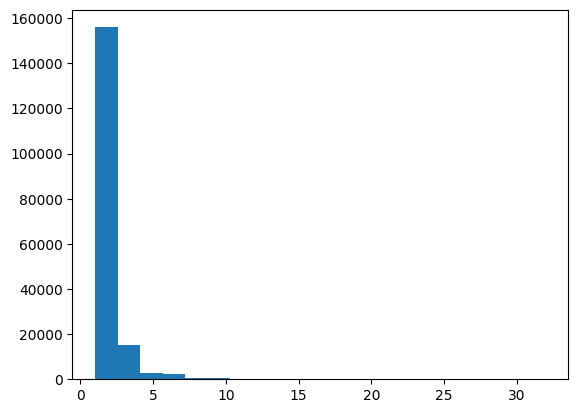

AusStage, At Least 5 Events:


,count,mean,std,min,25%,50%,75%,max
role_count,37387.0,2.93586,2.219295,1.0,1.0,2.0,4.0,32.0


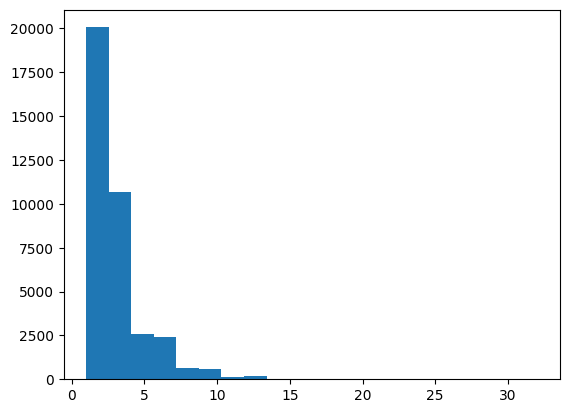

AusStage, AusStage 253:


,count,mean,std,min,25%,50%,75%,max
role_count,253.0,6.656126,3.917342,1.0,4.0,6.0,9.0,32.0


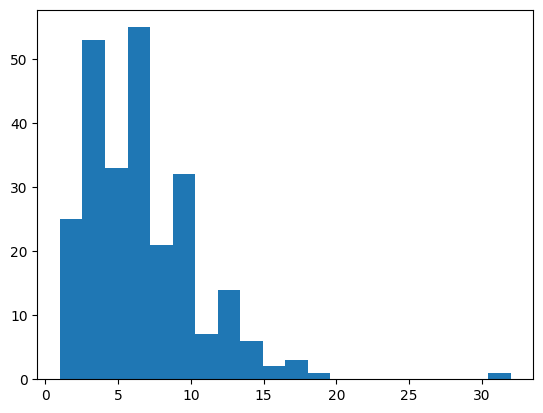

---------------------------------------------------------------------
AusStage, All, Male:


,count,mean,std,min,25%,50%,75%,max
role_count,92016.0,1.646561,1.451333,1.0,1.0,1.0,2.0,32.0


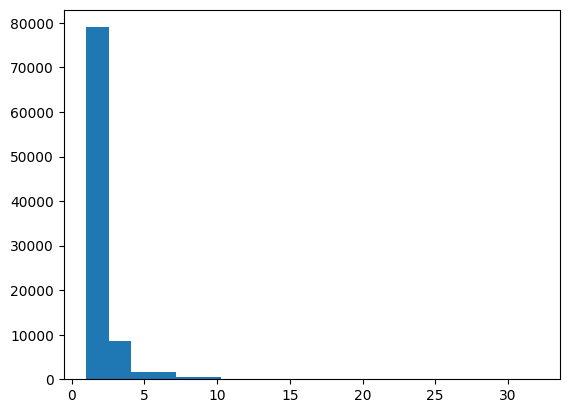

AusStage, At Least 5 Events, Male:


,count,mean,std,min,25%,50%,75%,max
role_count,21739.0,3.043608,2.332065,1.0,1.0,2.0,4.0,32.0


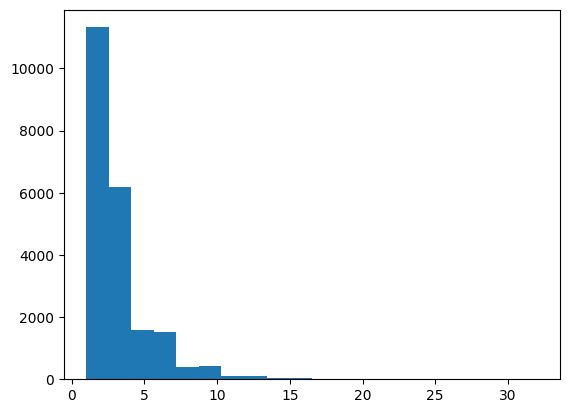

AusStage, AusStage 253, Male:


,count,mean,std,min,25%,50%,75%,max
role_count,161.0,7.273292,4.141237,1.0,5.0,7.0,9.0,32.0


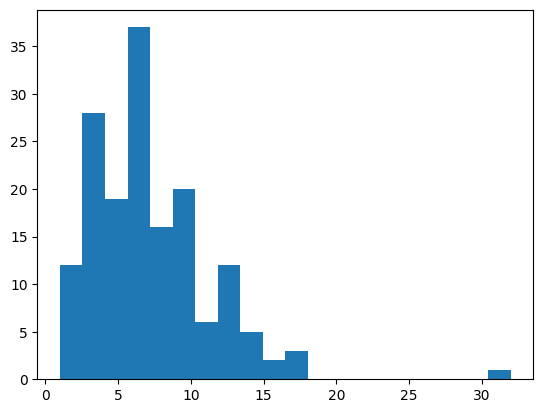

---------------------------------------------------------------------
AusStage, All, Female:


,count,mean,std,min,25%,50%,75%,max
role_count,79677.0,1.505014,1.184874,1.0,1.0,1.0,2.0,25.0


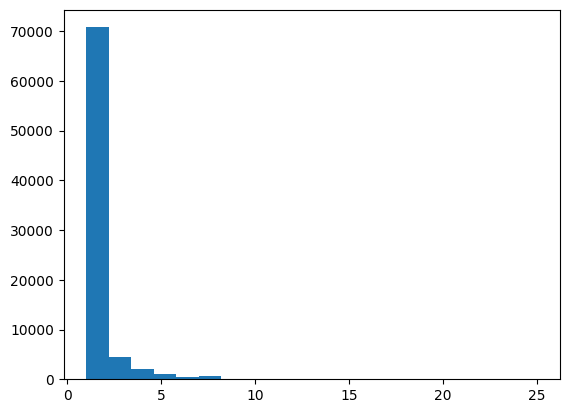

AusStage, At Least 5 Events, Female:


,count,mean,std,min,25%,50%,75%,max
role_count,15027.0,2.803421,2.055553,1.0,1.0,2.0,4.0,25.0


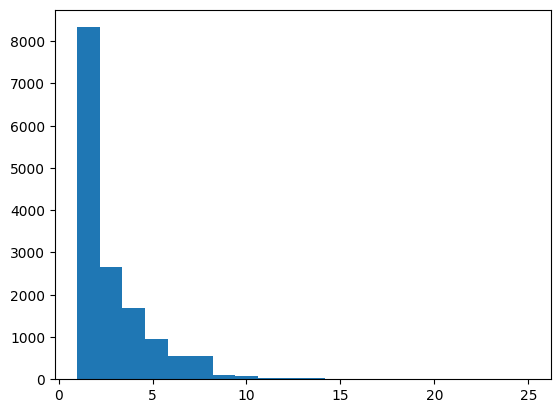

AusStage, AusStage 253, Female:


,count,mean,std,min,25%,50%,75%,max
role_count,92.0,5.576087,3.238619,1.0,3.0,5.0,7.0,19.0


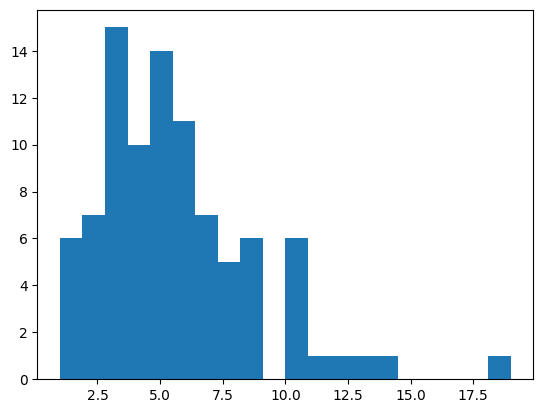

In [406]:
import matplotlib.pyplot as plt

def get_average_for_roles(df, gender=None):
    gender_str = ""
    if gender == "Male":
        df = df[df.gender.str.contains("Male", na=False)]
        gender_str = ", Male"
    if gender == "Female":
        df = df[df.gender.str.contains("Female", na=False)]
        gender_str = ", Female"
    
    print(f"AusStage, All{gender_str}:")
    display(pd.DataFrame(df["role_count"].describe()).T)
    plt.hist(df["role_count"], bins=20)
    plt.show()

    print(f"AusStage, At Least 5 Events{gender_str}:")
    display(pd.DataFrame(filter_by_ids(df, event5_ids)["role_count"].describe()).T)
    plt.hist(filter_by_ids(df, event5_ids)["role_count"], bins=20)
    plt.show()

    print(f"AusStage, AusStage 253{gender_str}:")
    display(pd.DataFrame(filter_by_ids(df, people253_ids)["role_count"].describe()).T)
    plt.hist(filter_by_ids(df, people253_ids)["role_count"], bins=20)
    plt.show()

get_average_for_roles(df=ausstage_role_count_gender)
print("---------------------------------------------------------------------")
get_average_for_roles(df=ausstage_role_count_gender, gender="Male")
print("---------------------------------------------------------------------")
get_average_for_roles(df=ausstage_role_count_gender, gender="Female")

In [408]:
ausstage_role_count_gender["MoreThan5Events"] = ausstage_role_count_gender["ori_id"].isin(event5_ids["subject.ori_id"].values)
ausstage_role_count_gender["AusStage253"] = ausstage_role_count_gender["ori_id"].isin(people253_ids["subject.ori_id"].values)
ausstage_role_count_gender.to_csv("data/for_nat/fig1.csv", index=False)

#### Breakdown of roles (Actor, Director, etc.) with number of participations and
percentage of people with each role (Table 4)

*Note: The frequency for the below summary tables refer to unique participation for a given role. For example, a person may have participated in AusStage events as an actor many times. However, we only count this as one Actor participation for the given person.*

In [425]:
# career_titles_dict_ausstage = {}

# # First, reset your dictionary creation
# # takes 2 mins
# for index, row in ausstage_persons.iterrows():
#     id = row["ori_id"]
#     # Instead of storing DataFrames, normalize data with an id column
#     if isinstance(row.career, str):
#         try:
#             career_data = ast.literal_eval(row.career)
#             if career_data:  # Only process if there's actual data
#                 try:
#                     unique_roles = pd.json_normalize(career_data["career_periods"])["occupation.title"].unique()
#                     career_titles_dict_ausstage[id] = unique_roles
#                 except:
#                     pass
#         except (ValueError, SyntaxError):
#             # Handle cases where ast.literal_eval fails
#             pass

# convert the dictionary to a DataFrame
# ausstage_role_titles = pd.DataFrame(list(career_titles_dict_ausstage.items()), columns=["ori_id", "role_titles"])
# ausstage_role_titles = ausstage_role_titles.explode("role_titles")
# ausstage_role_titles = pd.get_dummies(ausstage_role_titles, columns=["role_titles"], prefix="", prefix_sep="")
# ausstage_role_titles = ausstage_role_titles.groupby("ori_id").sum().reset_index()
# ausstage_role_titles.to_csv("data/ausstage_role_titles.csv", index=False)

ausstage_role_titles = pd.read_csv('data/ausstage_role_titles.csv')

In [440]:
def get_global_count_by_role(df, head_limit=20):
    role_counts = df.drop(columns=["ori_id"]).sum().sort_values(ascending=False).reset_index()
    role_counts.columns = ["role", "count"]
    role_counts["percentage"] = ((role_counts["count"] / df.shape[0]) * 100).round(2)
    display(role_counts.head(head_limit))

# get gender for each AusStage person in role count
ausstage_role_titles_gender = pd.merge(ausstage_role_titles, distinct_ausstage_ids_gender, on="ori_id", how="left")

print("AusStage, All:")
get_global_count_by_role(ausstage_role_titles)

print("AusStage, At Least 5 Events:")
get_global_count_by_role(filter_by_ids(ausstage_role_titles, event5_ids))

print("AusStage, AusStage 253:")
get_global_count_by_role(filter_by_ids(ausstage_role_titles, people253_ids))

print("AusStage, Male:")
get_global_count_by_role(filter_by_gender(ausstage_role_titles_gender, gender="Male").drop("gender", axis=1))

print("AusStage, At Least 5 Events, Male:")
get_global_count_by_role(filter_by_ids(ausstage_role_titles, event5_ids_male))

print("AusStage, AusStage 253, Male:")
get_global_count_by_role(filter_by_ids(ausstage_role_titles, people253_ids_male))

print("AusStage, Female:")
get_global_count_by_role(filter_by_gender(ausstage_role_titles_gender, gender="Female").drop("gender", axis=1))

print("AusStage, At Least 5 Events, Female:")
get_global_count_by_role(filter_by_ids(ausstage_role_titles, event5_ids_female))

print("AusStage, At Least 5 Events, Female:")
get_global_count_by_role(filter_by_ids(ausstage_role_titles, people253_ids_female))

AusStage, All:


,role,count,percentage
0,Actor,89391,50.16
1,Performer,17369,9.75
2,Dancer,12215,6.85
3,Director,12192,6.84
4,Actor and Singer,8665,4.86
5,Playwright,8189,4.60
6,Singer,6448,3.62
7,Musician,5500,3.09
8,Writer,5375,3.02
9,Stage Manager,5160,2.90


AusStage, At Least 5 Events:


,role,count,percentage
0,Actor,23122,61.85
1,Performer,7301,19.53
2,Director,6383,17.07
3,Actor and Singer,4237,11.33
4,Dancer,3880,10.38
5,Playwright,3627,9.70
6,Writer,2944,7.87
7,Singer,2587,6.92
8,Stage Manager,2576,6.89
9,Producer,2434,6.51


AusStage, AusStage 253:


,role,count,percentage
0,Actor,225,88.93
1,Director,142,56.13
2,Performer,125,49.41
3,Writer,63,24.90
4,Devisor,62,24.51
5,Playwright,60,23.72
6,Actor and Singer,50,19.76
7,Designer,50,19.76
8,Assistant Director,49,19.37
9,Adaptor,47,18.58


AusStage, Male:


,role,count,percentage
0,Actor,45299,49.23
1,Performer,8407,9.14
2,Director,7333,7.97
3,Playwright,5562,6.04
4,Actor and Singer,4258,4.63
5,Composer,3836,4.17
6,Dancer,3798,4.13
7,Musician,3687,4.01
8,Writer,3444,3.74
9,Singer,3167,3.44


AusStage, At Least 5 Events, Male:


,role,count,percentage
0,Actor,13083,60.18
1,Director,4105,18.88
2,Performer,3909,17.98
3,Playwright,2608,12.00
4,Actor and Singer,2280,10.49
5,Writer,2006,9.23
6,Composer,1689,7.77
7,Producer,1665,7.66
8,Dancer,1599,7.36
9,Stage Manager,1457,6.70


AusStage, AusStage 253, Male:


,role,count,percentage
0,Actor,142,88.20
1,Director,101,62.73
2,Performer,75,46.58
3,Designer,42,26.09
4,Writer,40,24.84
5,Playwright,38,23.60
6,Assistant Director,37,22.98
7,Devisor,36,22.36
8,Actor and Singer,36,22.36
9,Adaptor,35,21.74


AusStage, Female:


,role,count,percentage
0,Actor,42450,53.28
1,Performer,8199,10.29
2,Dancer,7656,9.61
3,Director,4538,5.70
4,Actor and Singer,4310,5.41
5,Singer,3173,3.98
6,Choreographer,2442,3.06
7,Playwright,2367,2.97
8,Stage Manager,2367,2.97
9,Costume Designer,2146,2.69


AusStage, At Least 5 Events, Female:


,role,count,percentage
0,Actor,9795,65.18
1,Performer,3287,21.87
2,Director,2216,14.75
3,Dancer,2197,14.62
4,Actor and Singer,1920,12.78
5,Singer,1232,8.20
6,Choreographer,1086,7.23
7,Stage Manager,1073,7.14
8,Playwright,987,6.57
9,Writer,909,6.05


AusStage, At Least 5 Events, Female:


,role,count,percentage
0,Actor,83,90.22
1,Performer,50,54.35
2,Director,41,44.57
3,Devisor,26,28.26
4,Writer,23,25.00
5,Playwright,22,23.91
6,Actor and Singer,14,15.22
7,Stage Manager,13,14.13
8,Adaptor,12,13.04
9,Assistant Director,12,13.04


In [443]:
ausstage_role_titles_gender = pd.merge(
    ausstage_role_titles_gender, 
    ausstage_role_count_gender[['ori_id','MoreThan5Events','AusStage253']], 
    on='ori_id'
)

ausstage_role_titles_gender.to_csv("data/for_nat/table4.csv", index=False)

#### List all the people with more than 15 roles in AusStage, with top 5 roles and
aggregate other roles, counts and percentages for each (Tables 2-3)

In [631]:
import json
more_than_15_roles_ids = ausstage_role_count_gender[ausstage_role_count_gender.role_count > 15].ori_id.values

more_than_15_roles_dataframe = pd.DataFrame()
for idx, id in enumerate(more_than_15_roles_ids):
    id_name = ausstage_persons[ausstage_persons.ori_id.isin([id])].display_name.iloc[0].replace('"', "")
    print(f"{idx+1}, Display Name: {id_name}")
    career_data_person = pd.json_normalize(json.loads(ausstage_persons[ausstage_persons.ori_id.isin([id])].career.iloc[0])["career_periods"])
    career_data_person["display_name"] = id_name
    more_than_15_roles_dataframe = pd.concat([more_than_15_roles_dataframe, career_data_person])
    # replace nan with "Other"
    career_data_person["occupation.title"] = career_data_person["occupation.title"].fillna("Other")
    occupations_person = career_data_person["occupation.title"].value_counts().reset_index()

    # if Other exists move it to the end
    other_row = occupations_person[occupations_person["occupation.title"] == "Other"]
    occupations_person = occupations_person[occupations_person["occupation.title"] != "Other"]
    occupations_person = pd.concat([occupations_person, other_row])

    # if occupation is not in the top 5, aggregate it into "Other"
    top_5_occupations = occupations_person.head(5)["occupation.title"].values

    occupations_person["occupation.title"] = occupations_person["occupation.title"].apply(lambda x: x if x in top_5_occupations else "Other")
    occupations_person = occupations_person.groupby("occupation.title").sum().reset_index().sort_values(by="count", ascending=False)

    # move other to the end
    other_row = occupations_person[occupations_person["occupation.title"] == "Other"]
    occupations_person = occupations_person[occupations_person["occupation.title"] != "Other"]
    occupations_person = pd.concat([occupations_person, other_row])

    # get percentage
    occupations_person["percentage"] = ((occupations_person["count"] / occupations_person["count"].sum()) * 100).round(2)
    occupations_person = occupations_person.T

    # RENAME the columns INTO role 1, role 2, role 3, role 4, role 5, Other
    occupations_person.columns = ["Role 1", "Role 2", "Role 3", "Role 4", "Role 5", "Other"]
    display(occupations_person)
    print("---------------------------------------------------------------------")


1, Display Name: Pierre Thibaudeau


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Teacher,Designer,Performance Artist,Performer,Devisor,Other
count,107,84,58,55,52,99
percentage,23.52,18.46,12.75,12.09,11.43,21.76


---------------------------------------------------------------------
2, Display Name: Robyn Archer


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Performer,Playwright,Devisor,Director,Writer,Other
count,64,36,26,19,16,60
percentage,28.96,16.29,11.76,8.6,7.24,27.15


---------------------------------------------------------------------
3, Display Name: Graeme Murphy AM


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Choreographer,Director,Dancer,Artistic Director,Producer,Other
count,303,60,29,23,9,45
percentage,64.61,12.79,6.18,4.9,1.92,9.59


---------------------------------------------------------------------
4, Display Name: Grant Fraser


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Lighting Designer,Playwright,Production Manager,Actor,Director,Other
count,35,14,9,7,7,25
percentage,36.08,14.43,9.28,7.22,7.22,25.77


---------------------------------------------------------------------
5, Display Name: Pat Rix


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Composer,Playwright,Musical Director,Devisor,Creator,Other
count,11,9,7,4,2,19
percentage,21.15,17.31,13.46,7.69,3.85,36.54


---------------------------------------------------------------------
6, Display Name: Jim Sharman


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Producer,Designer,Lighting Designer,Original Director,Other
count,108,25,7,7,7,23
percentage,61.02,14.12,3.95,3.95,3.95,12.99


---------------------------------------------------------------------
7, Display Name: Richard Davey


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Actor,Designer,Playwright,Librettist,Other
count,54,26,22,20,13,31
percentage,32.53,15.66,13.25,12.05,7.83,18.67


---------------------------------------------------------------------
8, Display Name: Wendy Harmer


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Writer,Performer,Playwright,Comedian,Adaptor,Other
count,20,19,10,8,5,19
percentage,24.69,23.46,12.35,9.88,6.17,23.46


---------------------------------------------------------------------
9, Display Name: Robert Jarman


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Actor,Designer,Devisor,Performer,Other
count,59,52,7,6,5,20
percentage,39.6,34.9,4.7,4.03,3.36,13.42


---------------------------------------------------------------------
10, Display Name: Terence Clarke


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Composer,Actor,Musical Director,Writer,Other
count,66,47,14,12,8,26
percentage,38.15,27.17,8.09,6.94,4.62,15.03


---------------------------------------------------------------------
11, Display Name: Meredith Rogers


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Designer,Devisor,Director,Performer,Other
count,17,6,3,3,3,12
percentage,38.64,13.64,6.82,6.82,6.82,27.27


---------------------------------------------------------------------
12, Display Name: Don Gay


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Designer,Actor,Singer,Composer,Other
count,70,56,44,7,6,40
percentage,31.39,25.11,19.73,3.14,2.69,17.94


---------------------------------------------------------------------
13, Display Name: Geoff Cobham


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Lighting Designer,Designer,Design Consultant,Creator,Director,Other
count,518,141,67,64,61,101
percentage,54.41,14.81,7.04,6.72,6.41,10.61


---------------------------------------------------------------------
14, Display Name: Timothy Sexton


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Composer,Conductor,Musical Director,Chorus Master/Mistress,Assistant Conductor,Other
count,142,49,31,20,13,40
percentage,48.14,16.61,10.51,6.78,4.41,13.56


---------------------------------------------------------------------
15, Display Name: Mark Jones


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Accompanist,Actor,Adaptor,Musical Director,Performer,Other
count,34,34,31,20,14,33
percentage,20.48,20.48,18.67,12.05,8.43,19.88


---------------------------------------------------------------------
16, Display Name: Peter J Wilson


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Performer,Puppeteer,Actor,Puppet Designer,Director,Other
count,78,54,40,37,28,80
percentage,24.61,17.03,12.62,11.67,8.83,25.24


---------------------------------------------------------------------
17, Display Name: Jonathan Biggins


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Writer,Performer,Director,Composer,Other
count,99,87,84,67,54,98
percentage,20.25,17.79,17.18,13.7,11.04,20.04


---------------------------------------------------------------------
18, Display Name: Christopher Ryan


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Performance Artist,Performer,Director,Collaborator,Other
count,28,22,20,13,12,52
percentage,19.05,14.97,13.61,8.84,8.16,35.37


---------------------------------------------------------------------
19, Display Name: Nick Enright


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Playwright,Writer,Director,Adaptor,Artistic Supervisor,Other
count,176,63,45,33,33,89
percentage,40.09,14.35,10.25,7.52,7.52,20.27


---------------------------------------------------------------------
20, Display Name: Mr Robert Kenneth Leslie Taylor


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Lighting Designer,Production Manager,General Manager,Administrator,Company Director,Other
count,114,109,86,51,47,155
percentage,20.28,19.4,15.3,9.07,8.36,27.58


---------------------------------------------------------------------
21, Display Name: Michael Tyack


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Musical Director,Musical Advisor,Musician,Conductor,Assistant Musical Director,Other
count,132,35,11,10,9,35
percentage,56.9,15.09,4.74,4.31,3.88,15.09


---------------------------------------------------------------------
22, Display Name: Ian Pidd


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Director,Performer,Writer,Composer,Other
count,26,18,10,10,3,14
percentage,32.1,22.22,12.35,12.35,3.7,17.28


---------------------------------------------------------------------
23, Display Name: Scott Witt


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Fight Director,Movement Director,Consultant,Director,Actor,Other
count,185,45,32,30,16,32
percentage,54.41,13.24,9.41,8.82,4.71,9.41


---------------------------------------------------------------------
24, Display Name: Kate Champion


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Choreographer,Performer,Dancer,Consultant,Other
count,79,33,23,16,15,23
percentage,41.8,17.46,12.17,8.47,7.94,12.17


---------------------------------------------------------------------
25, Display Name: Alan John


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Composer,Musical Director,Actor,Musical Supervisor,Musician,Other
count,166,22,18,18,8,21
percentage,65.61,8.7,7.11,7.11,3.16,8.3


---------------------------------------------------------------------
26, Display Name: Catherine Fitzgerald


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Stage Manager,Actor,Writer,Producer,Other
count,85,36,27,20,19,33
percentage,38.64,16.36,12.27,9.09,8.64,15.0


---------------------------------------------------------------------
27, Display Name: Barrie Kosky


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Composer,Adaptor,Musician,Actor,Other
count,65,8,7,6,5,36
percentage,51.18,6.3,5.51,4.72,3.94,28.35


---------------------------------------------------------------------
28, Display Name: Phillip Scott


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Musical Director,Performer,Writer,Lyricist,Actor,Other
count,131,83,74,59,51,133
percentage,24.67,15.63,13.94,11.11,9.6,25.05


---------------------------------------------------------------------
29, Display Name: Amanda Armstrong


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Artistic Director,Devisor,Performer,Creator,Other
count,21,5,4,4,2,13
percentage,42.86,10.2,8.16,8.16,4.08,26.53


---------------------------------------------------------------------
30, Display Name: Dave Brown


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Creator,Lighting Designer,Adaptor,Writer,Other
count,392,58,23,11,7,24
percentage,76.12,11.26,4.47,2.14,1.36,4.66


---------------------------------------------------------------------
31, Display Name: Richard Vabre


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Lighting Designer,Actor,Lighting Operator/Technician,Production Manager,Stage Manager,Other
count,470,23,14,11,4,16
percentage,87.36,4.28,2.6,2.04,0.74,2.97


---------------------------------------------------------------------
32, Display Name: Iain Grandage


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Composer,Musical Director,Musician,Musical Advisor,Musical Arranger,Other
count,63,20,18,9,8,28
percentage,43.15,13.7,12.33,6.16,5.48,19.18


---------------------------------------------------------------------
33, Display Name: Robert Reid


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Writer,Playwright,Actor,Composer,Other
count,32,26,23,12,3,12
percentage,29.63,24.07,21.3,11.11,2.78,11.11


---------------------------------------------------------------------
34, Display Name: Laurel Frank


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Costume Designer,Puppet Designer,Lighting Designer,Designer,Set Designer,Other
count,199,65,21,11,8,30
percentage,59.58,19.46,6.29,3.29,2.4,8.98


---------------------------------------------------------------------
35, Display Name: Nigel Kellaway


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Performer,Choreographer,Devisor,Actor,Other
count,35,34,9,8,6,29
percentage,28.93,28.1,7.44,6.61,4.96,23.97


---------------------------------------------------------------------
36, Display Name: Peter Batey


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Actor,Playwright,Designer,Production Manager,Other
count,168,108,53,23,21,67
percentage,38.18,24.55,12.05,5.23,4.77,15.23


---------------------------------------------------------------------
37, Display Name: Michael Eustice


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Director,Production Manager,Producer,Sound Designer,Other
count,28,21,10,8,8,22
percentage,28.87,21.65,10.31,8.25,8.25,22.68


---------------------------------------------------------------------
38, Display Name: Anne Godfrey-Smith OAM, BEM


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Producer,Actor,Costume Designer,Lighting Operator,Other
count,44,14,10,9,6,29
percentage,39.29,12.5,8.93,8.04,5.36,25.89


---------------------------------------------------------------------
39, Display Name: Barry Humphries AO


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Performer,Writer,Creator,Devisor,Other
count,124,84,39,19,17,47
percentage,37.58,25.45,11.82,5.76,5.15,14.24


---------------------------------------------------------------------
40, Display Name: Garry Ginivan


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Adaptor,Director,Producer,Actor,Lyricist,Other
count,132,101,36,19,13,33
percentage,39.52,30.24,10.78,5.69,3.89,9.88


---------------------------------------------------------------------
41, Display Name: Margie Medlin


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Lighting Designer,Projection Designer,Cinematographer,Visual Artist,Media Artist,Other
count,51,8,4,4,2,16
percentage,60.0,9.41,4.71,4.71,2.35,18.82


---------------------------------------------------------------------
42, Display Name: Tony Strachan


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Choreographer,Playwright,Actor,Director,Writer,Other
count,21,19,18,10,9,24
percentage,20.79,18.81,17.82,9.9,8.91,23.76


---------------------------------------------------------------------
43, Display Name: Michael Fuller


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Choreographer,Movement Director,Actor,Director,Fight Director,Other
count,141,37,26,19,14,22
percentage,54.44,14.29,10.04,7.34,5.41,8.49


---------------------------------------------------------------------
44, Display Name: Emma Valente


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Lighting Designer,Director,Creator,Sound Designer,Designer,Other
count,46,23,17,9,5,22
percentage,37.7,18.85,13.93,7.38,4.1,18.03


---------------------------------------------------------------------
45, Display Name: Barbara Howard


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Producer,Actor,Director,Soprano,Choir Master/Mistress,Other
count,37,7,7,7,5,23
percentage,43.02,8.14,8.14,8.14,5.81,26.74


---------------------------------------------------------------------
46, Display Name: Jamie Henson


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Lighting Designer,Production Manager,Stage Manager,Technician,Company Manager,Other
count,101,74,17,13,10,56
percentage,37.27,27.31,6.27,4.8,3.69,20.66


---------------------------------------------------------------------
47, Display Name: Max Lambert


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Composer,Musical Supervisor,Creator,Musical Director,Sound Designer,Other
count,90,68,33,26,8,32
percentage,35.02,26.46,12.84,10.12,3.11,12.45


---------------------------------------------------------------------
48, Display Name: Victoria Spence


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Performer,Actor,Creator,Collaborator,Devisor,Other
count,26,9,4,3,3,21
percentage,39.39,13.64,6.06,4.55,4.55,31.82


---------------------------------------------------------------------
49, Display Name: Garry Stewart


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Choreographer,Director,Creator,Devisor,Designer,Other
count,259,171,52,44,35,113
percentage,38.43,25.37,7.72,6.53,5.19,16.77


---------------------------------------------------------------------
50, Display Name: Deborah Pollard


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Performer,Director,Dramaturg,Devisor,Actor,Other
count,22,14,12,11,5,30
percentage,23.4,14.89,12.77,11.7,5.32,31.91


---------------------------------------------------------------------
51, Display Name: Casey Bennetto


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Dramaturg,Composer,Writer,Director,Musical Director,Other
count,40,22,20,14,14,35
percentage,27.59,15.17,13.79,9.66,9.66,24.14


---------------------------------------------------------------------
52, Display Name: Nigel Triffitt


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Designer,Devisor,Playwright,Composer,Other
count,105,93,53,16,7,23
percentage,35.35,31.31,17.85,5.39,2.36,7.74


---------------------------------------------------------------------
53, Display Name: Eddie Perfect


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Performer,Composer,Writer,Lyricist,Other
count,29,16,14,12,9,36
percentage,25.0,13.79,12.07,10.34,7.76,31.03


---------------------------------------------------------------------
54, Display Name: Stefan Haag


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Director,Producer,Actor and Singer,Actor,Lighting Designer,Other
count,122,42,23,12,3,17
percentage,55.71,19.18,10.5,5.48,1.37,7.76


---------------------------------------------------------------------
55, Display Name: Berin Denham


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Follow Spot Operator,Lighting Operator,Mechanist,Set and/or Property Maker,Other
count,21,9,7,7,7,31
percentage,25.61,10.98,8.54,8.54,8.54,37.8


---------------------------------------------------------------------
56, Display Name: Elizabeth Eden


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Musical Director,Pianist,Properties Master / Mistress,Musical Arranger,Sound Operator/Engineer,Other
count,15,6,6,5,4,22
percentage,25.86,10.34,10.34,8.62,6.9,37.93


---------------------------------------------------------------------
57, Display Name: Samuel James


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Video Designer,Video Artist,Designer,Director,Set Designer,Other
count,19,13,8,8,4,24
percentage,25.0,17.11,10.53,10.53,5.26,31.58


---------------------------------------------------------------------
58, Display Name: Petr Divis


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Director,Repetiteur,Musical Director,Set Designer,Other
count,9,9,9,6,2,13
percentage,18.75,18.75,18.75,12.5,4.17,27.08


---------------------------------------------------------------------
59, Display Name: Sean Weatherly


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Actor,Performer,Technician,Producer,Composer,Other
count,47,16,13,7,6,25
percentage,41.23,14.04,11.4,6.14,5.26,21.93


---------------------------------------------------------------------
60, Display Name: Bob Weatherly


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Production Manager,Technician,Stage Manager,Choreographer,Technical Manager,Other
count,332,99,41,38,26,72
percentage,54.61,16.28,6.74,6.25,4.28,11.84


---------------------------------------------------------------------
61, Display Name: Toby Simkin


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Assistant Stage Manager,Stage Manager,Executive Producer,Actor,Deputy Stage Manager,Other
count,15,8,6,4,3,14
percentage,30.0,16.0,12.0,8.0,6.0,28.0


---------------------------------------------------------------------
62, Display Name: Margaret Day


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Assistant Director,Assistant Producer,Assistant Stage Manager,Production Manager,Stage Manager,Other
count,7,5,4,4,4,21
percentage,15.56,11.11,8.89,8.89,8.89,46.67


---------------------------------------------------------------------
63, Display Name: Rogan Brown


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Set and/or Property Maker,Lighting Operator,Actor,Publicist,Stage Manager,Other
count,21,19,7,7,7,20
percentage,25.93,23.46,8.64,8.64,8.64,24.69


---------------------------------------------------------------------
64, Display Name: Grace Roberts


,Role 1,Role 2,Role 3,Role 4,Role 5,Other
occupation.title,Set Designer,Actor,Costume Designer,Photographer,Set and/or Property Maker,Other
count,5,3,3,2,2,12
percentage,18.52,11.11,11.11,7.41,7.41,44.44


---------------------------------------------------------------------


In [633]:
more_than_15_roles_dataframe.to_csv("data/for_nat/table2and3.csv", index=False)

### DAAO
Can we run all the following analyses on a) the whole of DAAO, b) the DAAO 2,188, c) the DAAO 500, also differentiated by gender

#### Most frequently occurring roles (Figure 2)

In [516]:
import io

daao_people['ori_url2'] = daao_people['ori_url'].apply(lambda x: eval(x))

top500 = fetch_small_data_from_github('DAAO_500_list.csv')

# find matches with unified data
top500_df = pd.DataFrame()
for i in top500['ori_url']: top500_df = pd.concat([top500_df, daao_people[daao_people['ori_url2'] == i]])

# remove last column of the dataframe and return df
daao500 = top500_df.iloc[:, :-1]
daao_2188 = pd.read_csv("data/daao_2188.csv")

daao_people["oid"] = daao_people["ori_dbid"].apply(lambda x: eval(x)["$oid"])
daao500_ids = daao500["ori_dbid"].apply(lambda x: eval(x)["$oid"]).values
daao2188_ids = daao_2188["_id"].values

In [495]:
career_titles_dict_daao = {}

# First, reset your dictionary creation
# takes 2 mins
for index, row in daao_people.iterrows():
    id = row["oid"]
    # Instead of storing DataFrames, normalize data with an id column
    if isinstance(row.career, str):
        try:
            career_data = ast.literal_eval(row.career)
            if career_data:  # Only process if there's actual data
                try:
                    unique_roles = pd.json_normalize(career_data["career_periods"])["occupation.title"].unique()
                    career_titles_dict_daao[id] = unique_roles
                except:
                    pass
        except (ValueError, SyntaxError):
            # Handle cases where ast.literal_eval fails
            pass

# convert the dictionary to a DataFrame
daao_role_titles = pd.DataFrame(list(career_titles_dict_daao.items()), columns=["oid", "role_titles"])
daao_role_titles = daao_role_titles.explode("role_titles")
daao_role_titles = pd.get_dummies(daao_role_titles, columns=["role_titles"], prefix="", prefix_sep="")
daao_role_titles = daao_role_titles.groupby("oid").sum().reset_index()

In [527]:
def get_global_count_by_daao_role(df, head_limit=20):
    role_counts = df.drop(columns=["oid"]).sum().sort_values(ascending=False).reset_index()
    role_counts.columns = ["role", "count"]
    role_counts["percentage"] = ((role_counts["count"] / df.shape[0]) * 100).round(2)
    display(role_counts.head(head_limit))

def filter_by_daaoids(df, ids):
    return df[df.oid.isin(ids)]

# get gender for each DAAO person in role count
distinct_daao_ids_gender = daao_people.drop_duplicates(subset=["oid"])[["oid","gender"]]
daao_role_titles_gender = pd.merge(daao_role_titles, distinct_daao_ids_gender, on="oid", how="left")

print("DAAO, All:")
get_global_count_by_daao_role(daao_role_titles)

print("DAAO500, All:")
get_global_count_by_daao_role(filter_by_daaoids(daao_role_titles, daao500_ids))

print("DAAO2188, All:")
get_global_count_by_daao_role(filter_by_daaoids(daao_role_titles, daao2188_ids))

print("DAAO, Males:")
daao_role_titles_males = filter_by_gender(daao_role_titles_gender, gender='"male"').drop("gender", axis=1)
get_global_count_by_daao_role(daao_role_titles_males)

print("DAAO500, Male:")
get_global_count_by_daao_role(filter_by_daaoids(daao_role_titles_males, daao500_ids))

print("DAAO2188, Male:")
get_global_count_by_daao_role(filter_by_daaoids(daao_role_titles_males, daao2188_ids))

print("DAAO, Female:")
daao_role_titles_females = filter_by_gender(daao_role_titles_gender, gender='"female"').drop("gender", axis=1)
get_global_count_by_daao_role(daao_role_titles_females)

print("DAAO500, Female:")
get_global_count_by_daao_role(filter_by_daaoids(daao_role_titles_females, daao500_ids))

print("DAAO2188, Female:")
get_global_count_by_daao_role(filter_by_daaoids(daao_role_titles_females, daao2188_ids))

DAAO, All:


,role,count,percentage
0,Painter,5387,45.94
1,Draughtsman,1849,15.77
2,Photographer,1467,12.51
3,Cartoonist / Illustrator,1446,12.33
4,Printmaker,1248,10.64
5,Sculptor,874,7.45
6,Textile Artist / Fashion Designer,560,4.78
7,Mixed Media Artist,385,3.28
8,Ceramist,384,3.27
9,Installation Artist,356,3.04


DAAO500, All:


,role,count,percentage
0,Painter,315,65.49
1,Printmaker,121,25.16
2,Sculptor,101,21.00
3,Draughtsman,66,13.72
4,Photographer,58,12.06
5,Installation Artist,53,11.02
6,Mixed Media Artist,49,10.19
7,Cartoonist / Illustrator,39,8.11
8,Teacher,31,6.44
9,Performance Artist,28,5.82


DAAO2188, All:


,role,count,percentage
0,Painter,1325,62.65
1,Printmaker,394,18.63
2,Cartoonist / Illustrator,347,16.41
3,Sculptor,304,14.37
4,Draughtsman,246,11.63
5,Photographer,178,8.42
6,Mixed Media Artist,157,7.42
7,Installation Artist,148,7.00
8,Teacher,123,5.82
9,Ceramist,110,5.20


DAAO, Males:


,role,count,percentage
0,Painter,2597,42.14
1,Draughtsman,1113,18.06
2,Photographer,1016,16.49
3,Cartoonist / Illustrator,978,15.87
4,Printmaker,677,10.98
5,Sculptor,480,7.79
6,Architect / Interior Architect / Landscape Arc...,251,4.07
7,Graphic Designer,173,2.81
8,Teacher,166,2.69
9,Industrial / Product Designer,160,2.60


DAAO500, Male:


,role,count,percentage
0,Painter,185,68.52
1,Printmaker,64,23.70
2,Sculptor,56,20.74
3,Draughtsman,38,14.07
4,Cartoonist / Illustrator,30,11.11
5,Photographer,30,11.11
6,Installation Artist,23,8.52
7,Mixed Media Artist,23,8.52
8,Performance Artist,17,6.30
9,Ceramist,13,4.81


DAAO2188, Male:


,role,count,percentage
0,Painter,695,61.78
1,Cartoonist / Illustrator,255,22.67
2,Printmaker,194,17.24
3,Sculptor,170,15.11
4,Draughtsman,131,11.64
5,Photographer,85,7.56
6,Installation Artist,70,6.22
7,Mixed Media Artist,66,5.87
8,Graphic Designer,57,5.07
9,Ceramist,54,4.80


DAAO, Female:


,role,count,percentage
0,Painter,2578,52.67
1,Draughtsman,598,12.22
2,Printmaker,529,10.81
3,Textile Artist / Fashion Designer,475,9.70
4,Sculptor,385,7.87
5,Photographer,356,7.27
6,Cartoonist / Illustrator,309,6.31
7,Mixed Media Artist,235,4.80
8,Ceramist,230,4.70
9,Installation Artist,195,3.98


DAAO500, Female:


,role,count,percentage
0,Painter,130,61.61
1,Printmaker,57,27.01
2,Sculptor,45,21.33
3,Installation Artist,30,14.22
4,Photographer,28,13.27
5,Draughtsman,28,13.27
6,Mixed Media Artist,26,12.32
7,Teacher,19,9.00
8,Textile Artist / Fashion Designer,18,8.53
9,Video Artist,15,7.11


DAAO2188, Female:


,role,count,percentage
0,Painter,627,63.65
1,Printmaker,198,20.10
2,Sculptor,134,13.60
3,Draughtsman,114,11.57
4,Photographer,93,9.44
5,Mixed Media Artist,91,9.24
6,Cartoonist / Illustrator,90,9.14
7,Textile Artist / Fashion Designer,85,8.63
8,Installation Artist,77,7.82
9,Teacher,72,7.31


In [529]:
daao_role_titles_gender["DAA0500"] = daao_role_titles_gender["oid"].isin(daao500_ids)
daao_role_titles_gender["DAAO2188"] = daao_role_titles_gender["oid"].isin(daao2188_ids)
daao_role_titles_gender.to_csv("data/for_nat/fig2.csv", index=False)

#### % with more than one role

In [534]:
career_count_dict_daao = {}

# First, reset your dictionary creation
# takes 2 mins
for index, row in daao_people.iterrows():
    id = row["oid"]
    # Instead of storing DataFrames, normalize data with an id column
    if isinstance(row.career, str):
        try:
            career_data = ast.literal_eval(row.career)
            if career_data:  # Only process if there's actual data
                try:
                    unique_roles = pd.json_normalize(career_data["career_periods"])["occupation.title"].nunique()
                    career_count_dict_daao[id] = unique_roles
                except:
                    pass
        except (ValueError, SyntaxError):
            # Handle cases where ast.literal_eval fails
            pass

# convert the dictionary to a DataFrame
daao_role_count = pd.DataFrame(list(career_count_dict_daao.items()), columns=["oid", "role_count"])

In [545]:
# get gender for each DAAO person in role count
daao_role_count_gender = pd.merge(daao_role_count, distinct_daao_ids_gender, on="oid", how="left")

# get dataset-specific ids by gender
daao500_ids_male = daao_role_titles_gender[(daao_role_titles_gender.DAA0500) & (daao_role_titles_gender.gender.str.contains('"male"'))].oid.unique()
daao500_ids_female = daao_role_titles_gender[(daao_role_titles_gender.DAA0500) & (daao_role_titles_gender.gender.str.contains('"male"'))].oid.unique()

daao2188_ids_male = daao_role_titles_gender[(daao_role_titles_gender.DAAO2188) & (daao_role_titles_gender.gender.str.contains('"female"'))].oid.unique()
daao2188_ids_female = daao_role_titles_gender[(daao_role_titles_gender.DAAO2188) & (daao_role_titles_gender.gender.str.contains('"female"'))].oid.unique()

print(f"{get_percentile(df=daao_role_count_gender):.2f}% of people have more than one role in DAAO.")
print(f"{get_percentile(df=filter_by_daaoids(daao_role_count_gender, daao500_ids)):.2f}% of people have more than one role in DAAO500.")
print(f"{get_percentile(df=filter_by_daaoids(daao_role_count_gender, daao2188_ids)):.2f}% of people have more than one role in DAAO2188.")
print("---------------------------------------------------------------------")
print(f"{get_percentile(df=filter_by_gender(daao_role_count_gender,'"male"')):.2f}% of males have more than one role in DAAO.")
print(f"{get_percentile(df=filter_by_daaoids(daao_role_count_gender, daao500_ids_male)):.2f}% of males have more than one role in DAAO500.")
print(f"{get_percentile(df=filter_by_daaoids(daao_role_count_gender, daao2188_ids_male)):.2f}% of males have more than one role in DAAO2188.")
print("---------------------------------------------------------------------")
print(f"{get_percentile(df=filter_by_gender(daao_role_count_gender,'"female"')):.2f}% of females have more than one role in DAAO.")
print(f"{get_percentile(df=filter_by_daaoids(daao_role_count_gender, daao500_ids_female)):.2f}% of females have more than one role DAAO500.")
print(f"{get_percentile(df=filter_by_daaoids(daao_role_count_gender, daao2188_ids_female)):.2f}% of females have more than one role in DAAO2188.")

46.29% of people have more than one role in DAAO.
71.93% of people have more than one role in DAAO500.
64.59% of people have more than one role in DAAO2188.
---------------------------------------------------------------------
56.00% of males have more than one role in DAAO.
72.22% of males have more than one role in DAAO500.
60.71% of males have more than one role in DAAO2188.
---------------------------------------------------------------------
37.77% of females have more than one role in DAAO.
72.22% of females have more than one role DAAO500.
60.71% of females have more than one role in DAAO2188.


#### Average number of roles per person

DAAO, All:


,count,mean,std,min,25%,50%,75%,max
role_count,11727.0,1.984907,1.515184,1.0,1.0,1.0,2.0,21.0


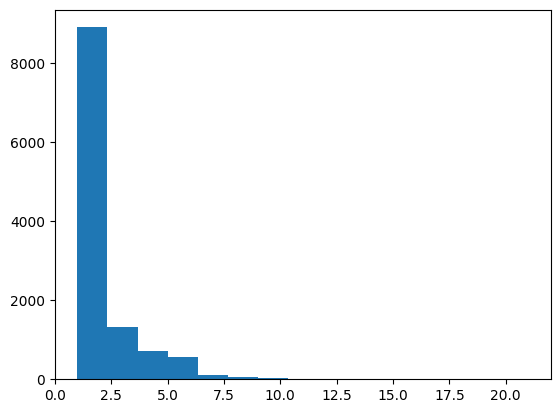

DAAO500:


,count,mean,std,min,25%,50%,75%,max
role_count,481.0,2.995842,2.032031,1.0,1.0,3.0,4.0,14.0


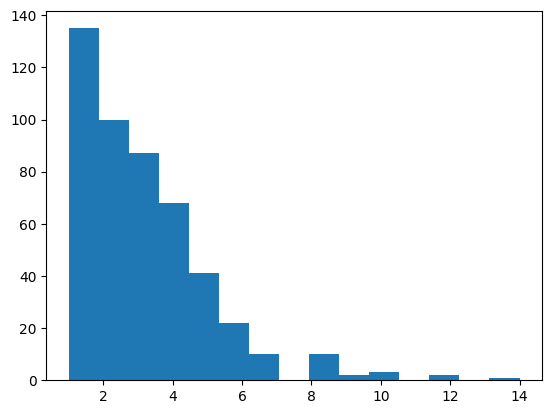

DAAO2188:


,count,mean,std,min,25%,50%,75%,max
role_count,2115.0,2.746572,2.0477,1.0,1.0,2.0,4.0,21.0


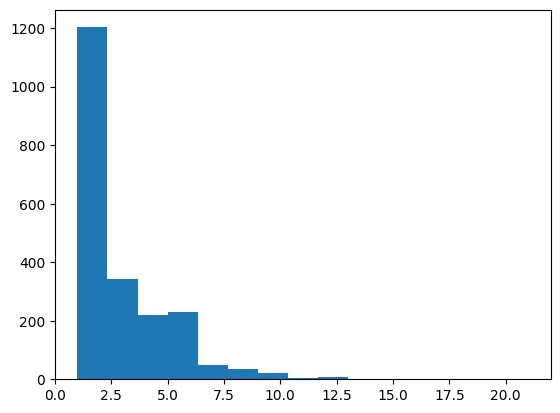

---------------------------------------------------------------------
DAAO, All, Male:


,count,mean,std,min,25%,50%,75%,max
role_count,6163.0,2.226675,1.608881,1.0,1.0,2.0,3.0,21.0


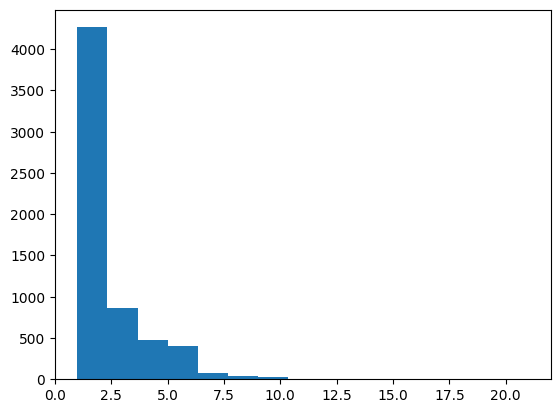

DAAO500, Male:


,count,mean,std,min,25%,50%,75%,max
role_count,270.0,2.981481,1.940478,1.0,1.0,3.0,4.0,12.0


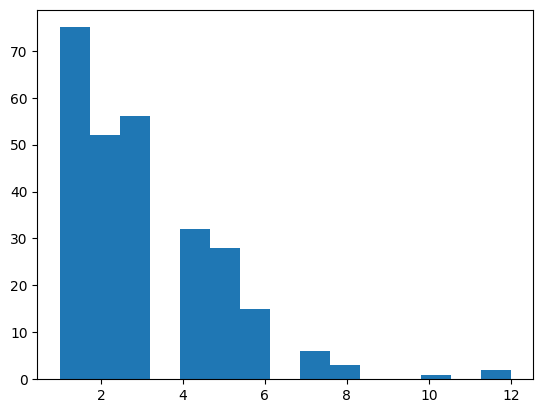

DAAO2188, Male:


,count,mean,std,min,25%,50%,75%,max
role_count,1125.0,2.8,2.010648,1.0,1.0,2.0,4.0,21.0


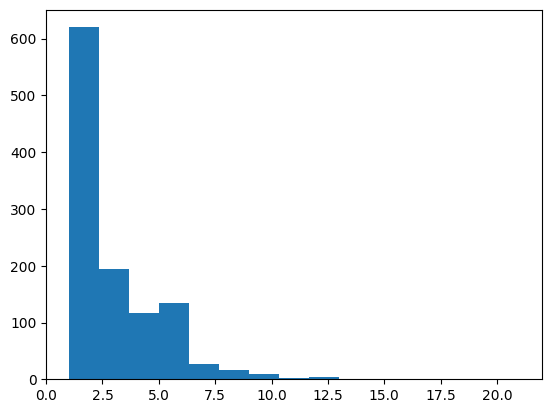

---------------------------------------------------------------------
DAAO, All, Female:


,count,mean,std,min,25%,50%,75%,max
role_count,4895.0,1.779775,1.41035,1.0,1.0,1.0,2.0,15.0


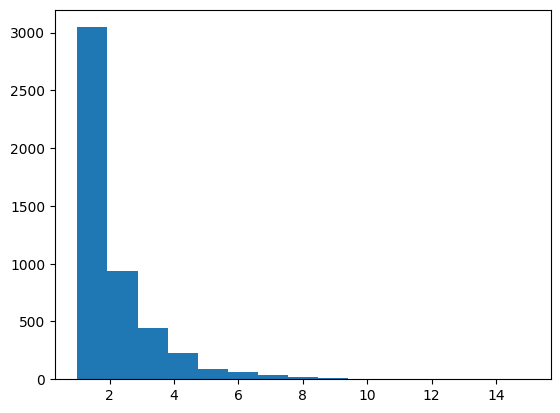

DAAO500, Female:


,count,mean,std,min,25%,50%,75%,max
role_count,211.0,3.014218,2.148042,1.0,1.0,2.0,4.0,14.0


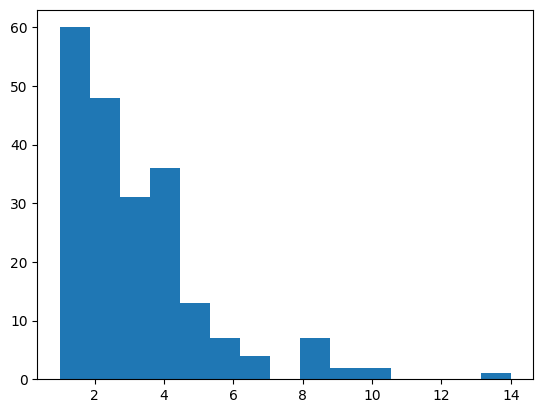

DAAO2188, Female:


,count,mean,std,min,25%,50%,75%,max
role_count,985.0,2.68731,2.090846,1.0,1.0,2.0,4.0,15.0


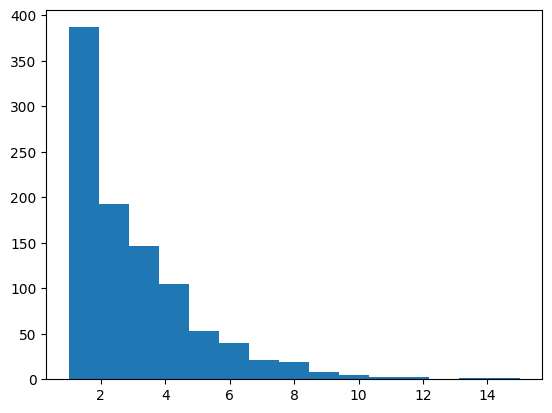

In [552]:
import matplotlib.pyplot as plt

def get_average_for_daao_roles(df, gender=None):
    gender_str = ""
    if gender == 'Male':
        df = df[df.gender.str.contains('"male"', na=False)]
        gender_str = ", Male"
    if gender == 'Female':
        df = df[df.gender.str.contains('"female"', na=False)]
        gender_str = ", Female"
    
    print(f"DAAO, All{gender_str}:")
    display(pd.DataFrame(df["role_count"].describe()).T)
    plt.hist(df["role_count"], bins=15)
    plt.show()

    print(f"DAAO500{gender_str}:")
    display(pd.DataFrame(filter_by_daaoids(df, daao500_ids)["role_count"].describe()).T)
    plt.hist(filter_by_daaoids(df, daao500_ids)["role_count"], bins=15)
    plt.show()

    print(f"DAAO2188{gender_str}:")
    display(pd.DataFrame(filter_by_daaoids(df, daao2188_ids)["role_count"].describe()).T)
    plt.hist(filter_by_daaoids(df, daao2188_ids)["role_count"], bins=15)
    plt.show()

get_average_for_daao_roles(df=daao_role_count_gender)
print("---------------------------------------------------------------------")
get_average_for_daao_roles(df=daao_role_count_gender, gender="Male")
print("---------------------------------------------------------------------")
get_average_for_daao_roles(df=daao_role_count_gender, gender="Female")

### Visualisations (Tabular data OK if visualisations will take too long, please include both if possible)

#### Scatter plot of number of events vs. number of roles in AusStage

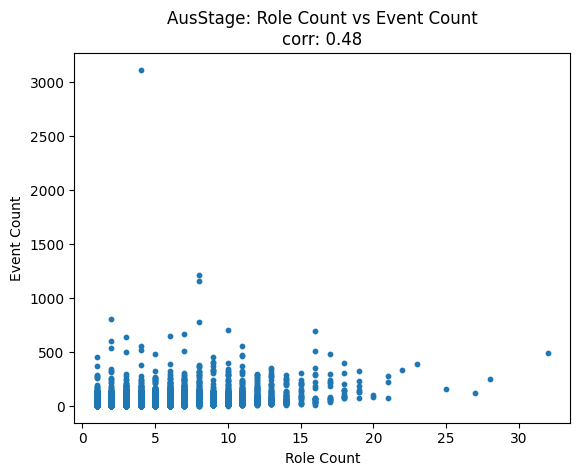

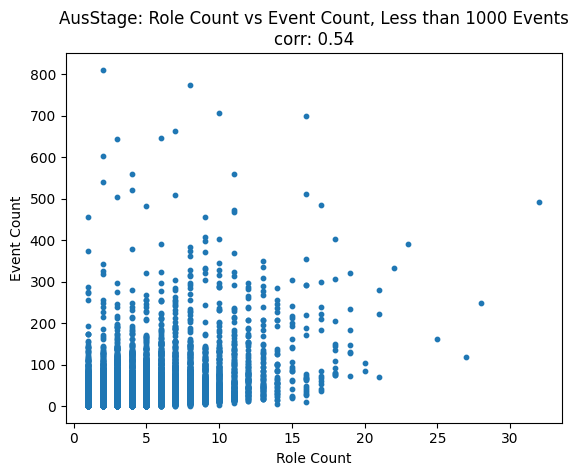

In [656]:
ausstage_events_vs_roles = pd.merge(people_with_event_years_grouped[["subject.ori_id", "event_count"]], ausstage_role_count, left_on="subject.ori_id", right_on="ori_id", how="inner")
ausstage_events_vs_roles[["event_count", "role_count"]].corr()

# scatter plot
plt.scatter(ausstage_events_vs_roles["role_count"], ausstage_events_vs_roles["event_count"], s=10)
plt.ylabel("Event Count")
plt.xlabel("Role Count")
plt.title(f"AusStage: Role Count vs Event Count\ncorr: {ausstage_events_vs_roles[['event_count', 'role_count']].corr().iloc[0,1]:.2f}")
plt.show()

# scatter plot
less_than_1000_events = ausstage_events_vs_roles[ausstage_events_vs_roles["event_count"] < 1000]
plt.scatter(less_than_1000_events["role_count"], less_than_1000_events["event_count"], s=10)
plt.ylabel("Event Count")
plt.xlabel("Role Count")
plt.title(f"AusStage: Role Count vs Event Count, Less than 1000 Events\ncorr: {less_than_1000_events[['event_count', 'role_count']].corr().iloc[0,1]:.2f}")
plt.show()

In [926]:
ausstage_events_vs_roles.to_csv("data/for_nat/ausstage_events_vs_roles.csv", index=False)

#### Scatter plot of the number of roles per person by decade of birth date from DAAO 500, and first event from AusStage. Looking to show a trend of increasing or decreasing interdisciplinarity over time.

First event from AusStage meaning the year of the first event in which each individual contributor participated. This might be marked as ‘career start date’?

In [802]:
# we need number of roles, DAAO500
# we need birth date, and decade of birth date
# year of first event of AusStage

daao_ausstage_names = display_name_source_count[display_name_source_count["daao_ausstage"] == 1].reset_index().display_name.unique()
daao_500_in_ausstage = daao_people[(daao_people["display_name"].isin(daao_ausstage_names)) & (daao_people.oid.isin(daao500_ids))]
daao_500_in_ausstage["birth_year"] = [
    int(pd.json_normalize(json.loads(row.birth))["coverage.date.year"].values[0]) for _, row in daao_500_in_ausstage.iterrows()
]

daao_500_in_ausstage_with_birth = pd.merge(daao_role_count, daao_500_in_ausstage[["oid", "birth_year","display_name"]], on="oid", how="right")
daao_500_in_ausstage_with_birth = daao_500_in_ausstage_with_birth[daao_500_in_ausstage_with_birth.role_count.notnull()]
daao_500_in_ausstage_with_birth["birth_decade"] = (daao_500_in_ausstage_with_birth["birth_year"] // 10) * 10

ausstage_persons_in_daao500 = ausstage_persons[ausstage_persons.display_name.isin(daao_500_in_ausstage_with_birth.display_name)]

first_events = []

for idx, row in ausstage_persons_in_daao500.iterrows():
    try:
        events_for_id = pd.json_normalize(json.loads(row.related_events))["object.ori_id"].values
        event_years = []
        for jdx, jrow in ausstage_event[ausstage_event.ori_id.isin(events_for_id)].iterrows():
            event_years.append(int(pd.json_normalize(json.loads(jrow.coverage_ranges))["date_range.date_start.year"].values[0]))
        if len(event_years) > 0:
            first_events.append(min(event_years))
        else:
            first_events.append(None)
    except:
        first_events.append(None)

ausstage_persons_in_daao500["first_events"] = first_events
ausstage_persons_in_daao500.dropna(subset=["first_events"], inplace=True)

# remove duplicates
duplicate_names = ausstage_persons_in_daao500.display_name.value_counts()[(ausstage_persons_in_daao500.display_name.value_counts() > 1)].index
ausstage_persons_in_daao500 = ausstage_persons_in_daao500[~ausstage_persons_in_daao500.display_name.isin(duplicate_names)]

interdisciplinarity_data = pd.merge(daao_500_in_ausstage_with_birth, ausstage_persons_in_daao500[["display_name", "first_events"]], on="display_name", how="inner")

interdisciplinarity_data["year_diff"] = interdisciplinarity_data["first_events"] - interdisciplinarity_data["birth_year"]
interdisciplinarity_data = interdisciplinarity_data[(interdisciplinarity_data.year_diff > 0) & (interdisciplinarity_data.year_diff < 90)].copy()

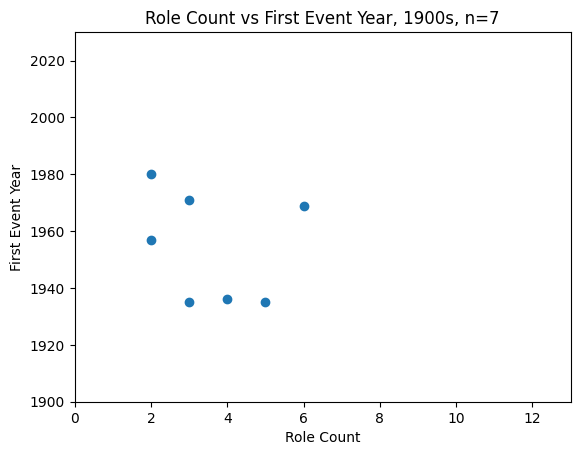

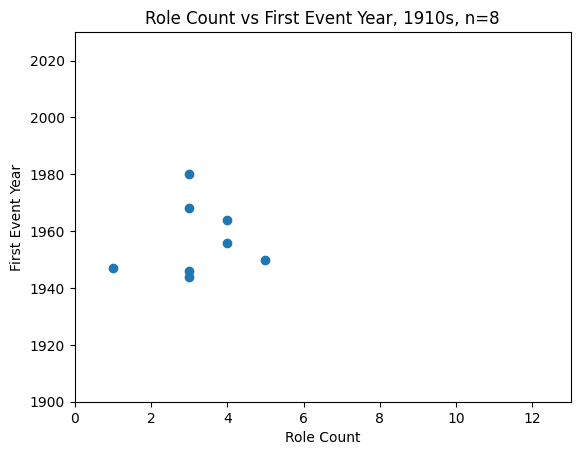

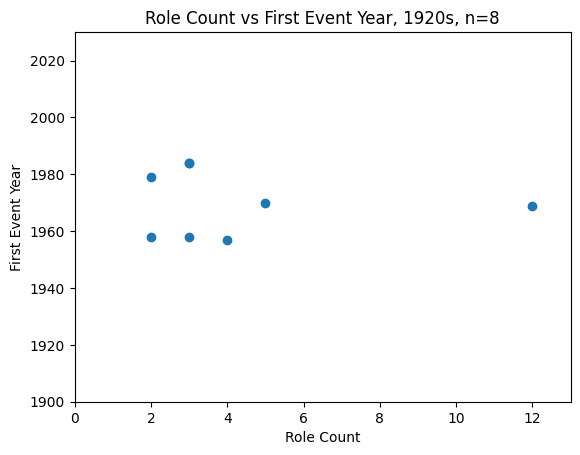

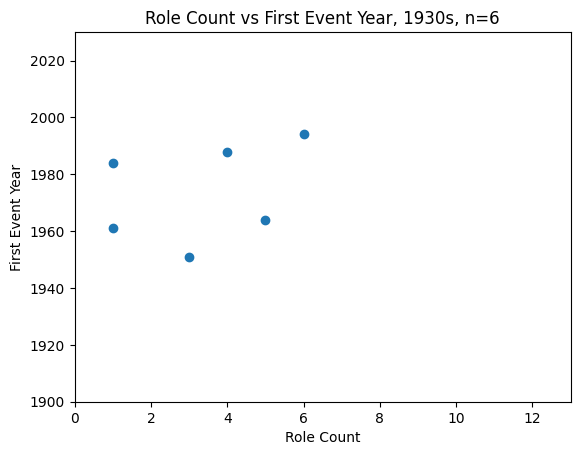

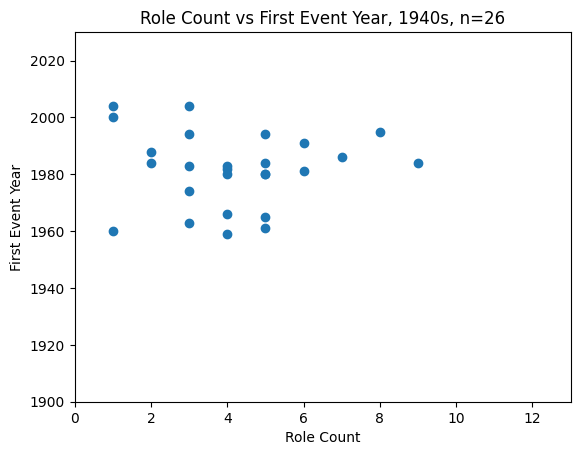

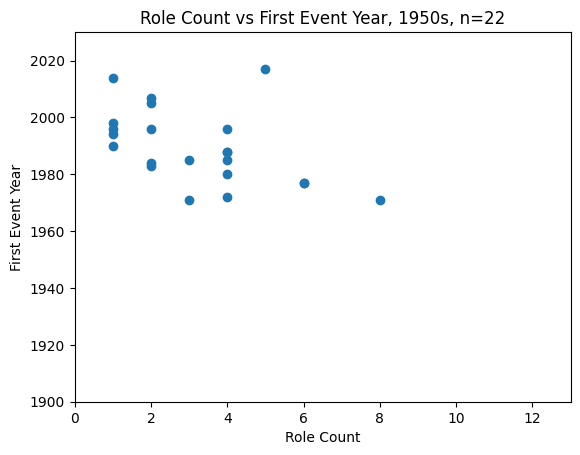

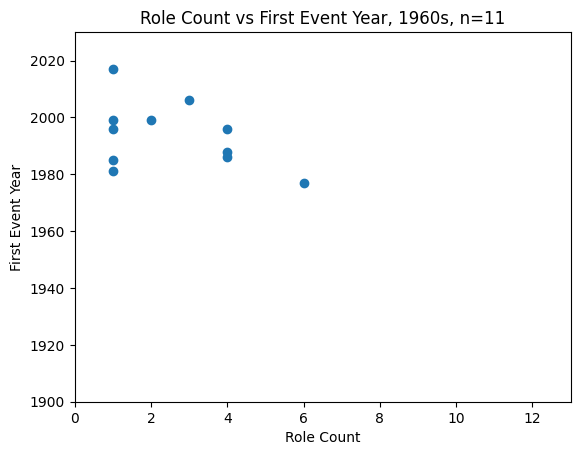

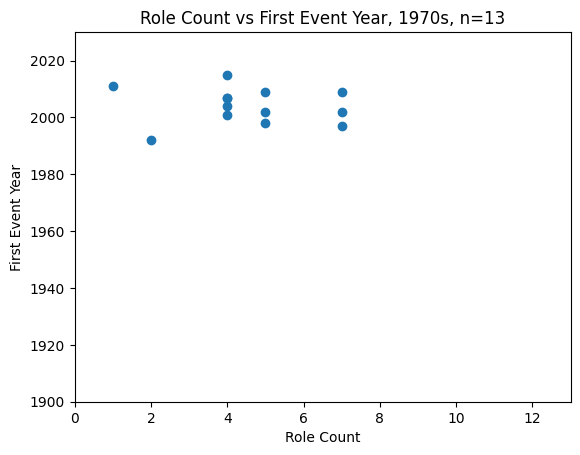

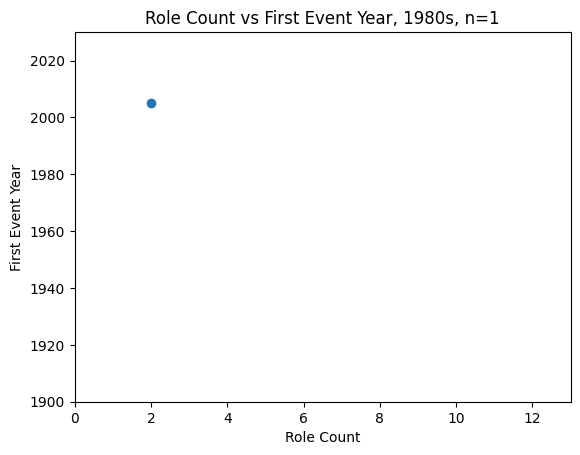

In [803]:
for decade in sorted(interdisciplinarity_data.birth_decade.unique()):
    interdisciplinarity_data_decade = interdisciplinarity_data[interdisciplinarity_data.birth_decade == decade]
    # scatter plot of role_count and first_events
    plt.scatter(interdisciplinarity_data_decade["role_count"], interdisciplinarity_data_decade["first_events"])
    plt.ylabel("First Event Year")
    plt.xlabel("Role Count")
    plt.title(f"Role Count vs First Event Year, {decade}s, n={interdisciplinarity_data_decade.shape[0]}")

    # make all y-axis limits from 1900 to 2020
    plt.ylim(1900, 2030)
    plt.xlim(0, 13)

    plt.show()

We also provide a scatter plot with all data but with normalised time. This way one can compare the time between birth_year and first event year.

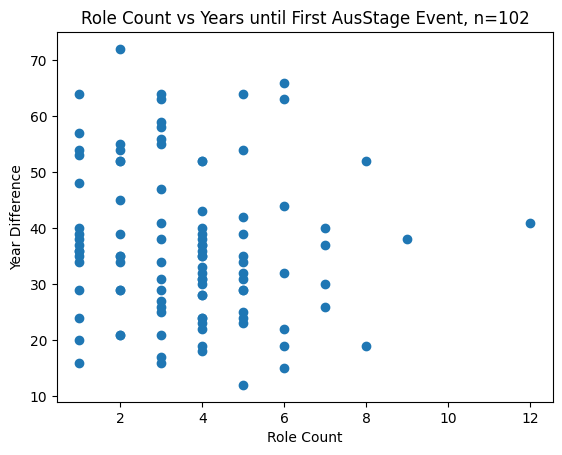

In [805]:
plt.scatter(interdisciplinarity_data["role_count"], interdisciplinarity_data["year_diff"])
plt.ylabel("Year Difference")
plt.xlabel("Role Count")
plt.title(f"Role Count vs Years until First AusStage Event, n={interdisciplinarity_data.shape[0]}")
plt.show()

In [928]:
interdisciplinarity_data.to_csv("data/for_nat/interdisciplinarity_data.csv", index=False)

#### Line graph of different roles for the following people in AusStage by date,
showing rise and fall of different roles over time:
- John Bell
- Geoffrey Rush
- Nick Cave

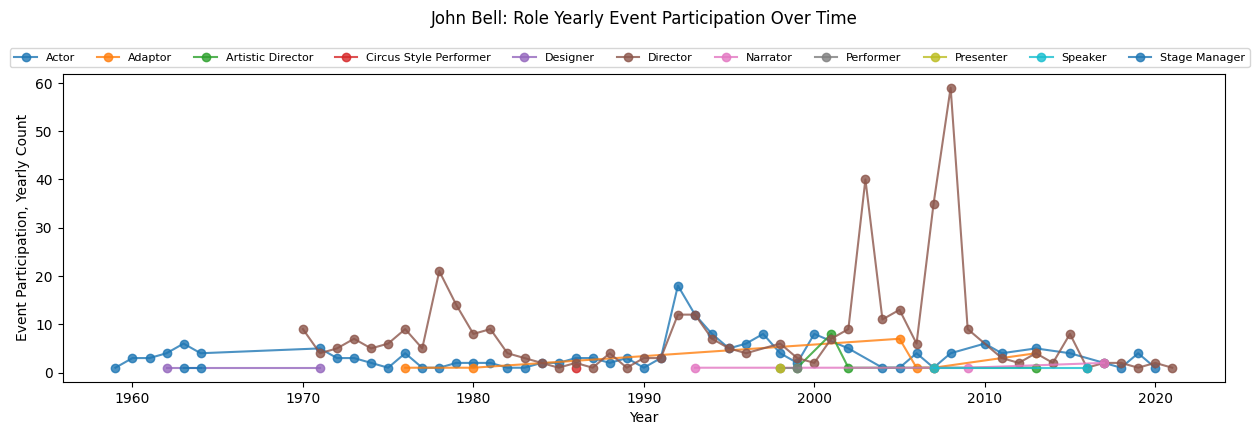

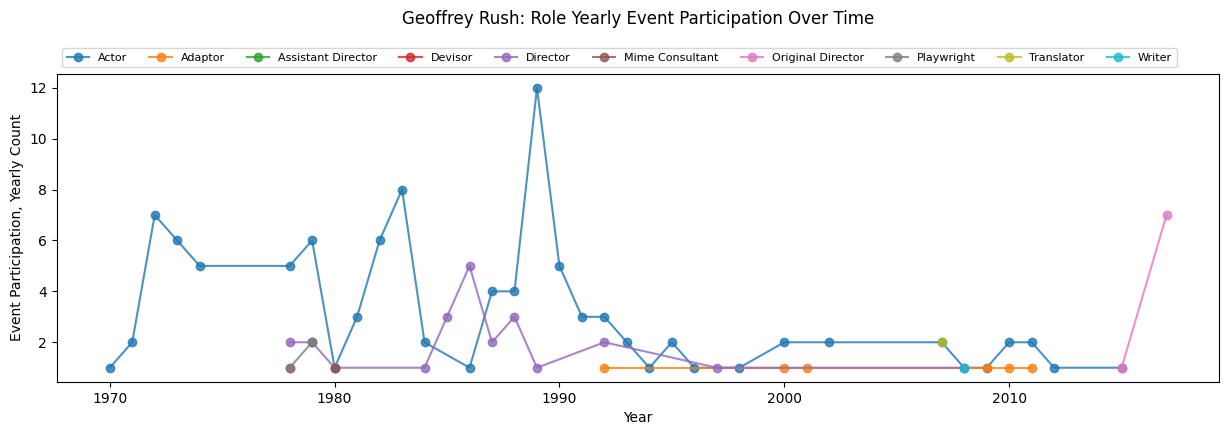

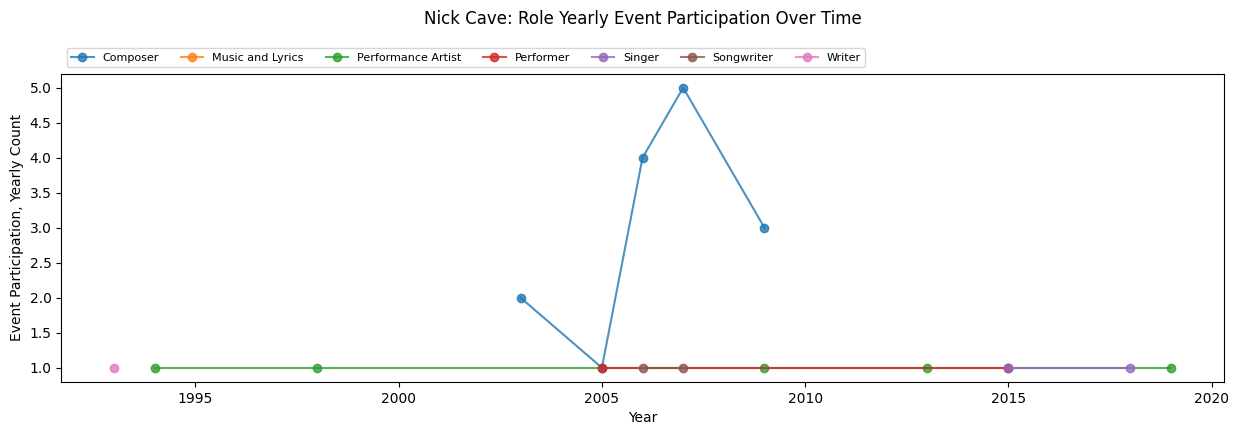

In [931]:
john_bell = ausstage_people[ausstage_people.display_name.str.contains('"John Bell"')]
geoffrey_rush = ausstage_people[ausstage_people.display_name.str.contains('"Geoffrey Rush AC"')]
nick_cave = ausstage_people[ausstage_people.display_name.str.contains('"Nick Cave"')]

# get yearly count of roles
john_bell_roles_full = pd.json_normalize(json.loads(john_bell.iloc[0].career)["career_periods"])[["occupation.title","coverage_range.date_range.date_start.year"]]
john_bell_roles = john_bell_roles_full.groupby(["occupation.title","coverage_range.date_range.date_start.year"]).size().reset_index(name="count")

# make figure larger
plt.figure(figsize=(15, 4))

# show line plot of roles over time
for role in john_bell_roles["occupation.title"].unique():
    role_data = john_bell_roles[john_bell_roles["occupation.title"] == role]
    role_data = role_data.sort_values(by="coverage_range.date_range.date_start.year")
    plt.plot(role_data["coverage_range.date_range.date_start.year"].astype(int), role_data["count"], label=role, marker="o", alpha=0.8)

# make legend horizontal, make font size smaller
plt.legend(loc="upper left", bbox_to_anchor=(-0.05,1.1), ncol=11, fontsize=8)
plt.ylabel("Event Participation, Yearly Count")
plt.xlabel("Year")
plt.title("John Bell: Role Yearly Event Participation Over Time\n\n")
plt.show()

# get yearly count of roles
geoffrey_rush_roles_full = pd.json_normalize(json.loads(geoffrey_rush.iloc[0].career)["career_periods"])[["occupation.title","coverage_range.date_range.date_start.year"]]
geoffrey_rush_roles = geoffrey_rush_roles_full.groupby(["occupation.title","coverage_range.date_range.date_start.year"]).size().reset_index(name="count")

# make figure larger
plt.figure(figsize=(15, 4))

# show line plot of roles over time
for role in geoffrey_rush_roles["occupation.title"].unique():
    role_data = geoffrey_rush_roles[geoffrey_rush_roles["occupation.title"] == role]
    role_data = role_data.sort_values(by="coverage_range.date_range.date_start.year")
    plt.plot(role_data["coverage_range.date_range.date_start.year"].astype(int), role_data["count"], label=role, marker="o", alpha=0.8)

# make legend horizontal, make font size smaller
plt.legend(loc="upper left", bbox_to_anchor=(0,1.1), ncol=11, fontsize=8)
plt.ylabel("Event Participation, Yearly Count")
plt.xlabel("Year")
plt.title("Geoffrey Rush: Role Yearly Event Participation Over Time\n\n")
plt.show()

# get yearly count of roles
nick_cave_roles_full = pd.json_normalize(json.loads(nick_cave.iloc[0].career)["career_periods"])[["occupation.title","coverage_range.date_range.date_start.year"]]
nick_cave_roles = nick_cave_roles_full.groupby(["occupation.title","coverage_range.date_range.date_start.year"]).size().reset_index(name="count")

# make figure larger
plt.figure(figsize=(15, 4))

# show line plot of roles over time
for role in nick_cave_roles["occupation.title"].unique():
    role_data = nick_cave_roles[nick_cave_roles["occupation.title"] == role]
    role_data = role_data.sort_values(by="coverage_range.date_range.date_start.year")
    plt.plot(role_data["coverage_range.date_range.date_start.year"].astype(int), role_data["count"], label=role, marker="o", alpha=0.8)

# make legend horizontal, make font size smaller
plt.legend(loc="upper left", bbox_to_anchor=(0,1.1), ncol=11, fontsize=8)
plt.ylabel("Event Participation, Yearly Count")
plt.xlabel("Year")
plt.title("Nick Cave: Role Yearly Event Participation Over Time\n\n")
plt.show()

Same plot as above but as subplots

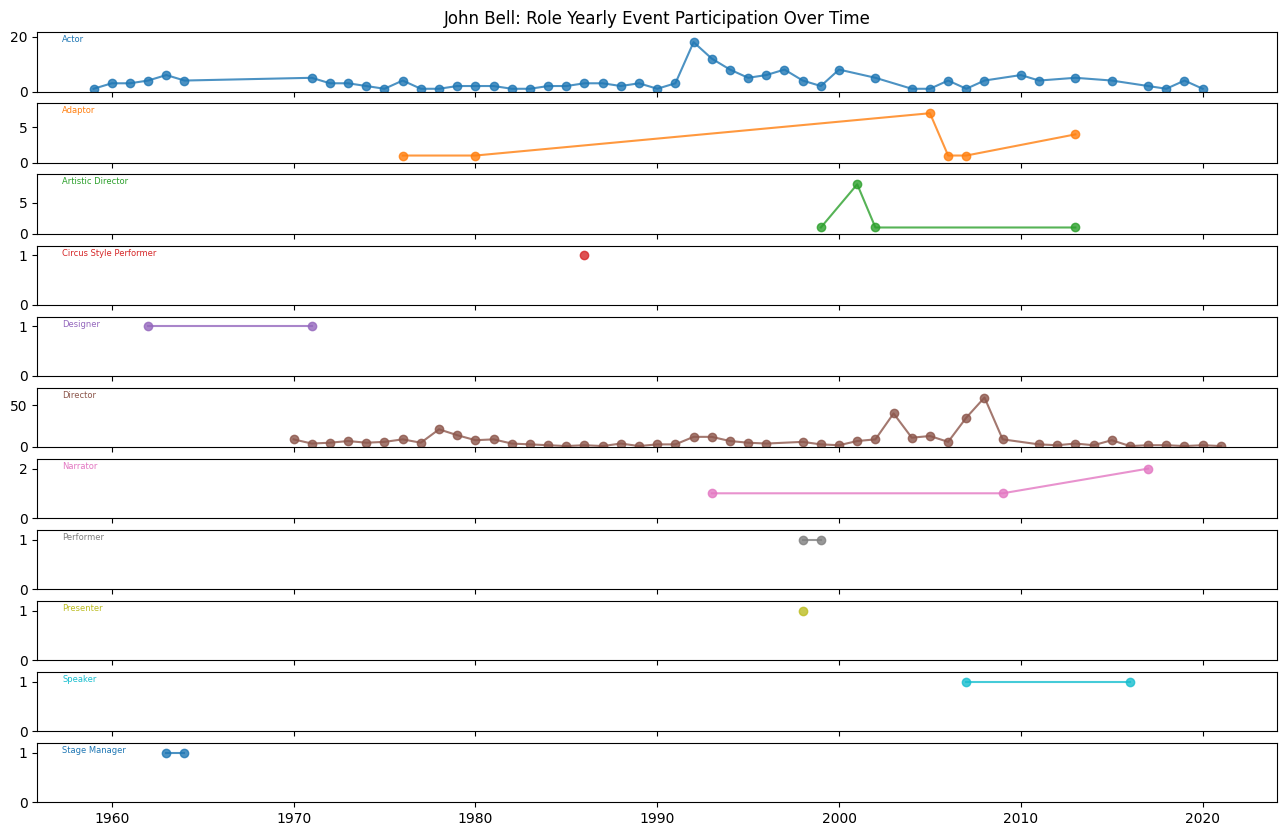

In [922]:
# create subplots for each occupation over time with a shared x-axis
fig, axs = plt.subplots(john_bell_roles["occupation.title"].nunique(), 1, figsize=(16, 10), sharex=True)

# show line plot of roles over time
axs[0].set_title("John Bell: Role Yearly Event Participation Over Time")

# assign each plot a different color
for idx, role in enumerate(john_bell_roles["occupation.title"].unique()):
    role_data = john_bell_roles[john_bell_roles["occupation.title"] == role]
    role_data = role_data.sort_values(by="coverage_range.date_range.date_start.year")
    axs[idx].plot(
        role_data["coverage_range.date_range.date_start.year"].astype(int), role_data["count"], 
        label=role, marker="o", alpha=0.8, color=f"C{idx}"
        )

    # make sure each y-axis starts as 0
    axs[idx].set_ylim(0, role_data["count"].max()*1.2)

    # add role as annoation in toip right
    axs[idx].annotate(role, xy=(0.02, 0.95), xycoords="axes fraction", ha="left", va="top", fontsize=6, color=f"C{idx}")

# make legend horizontal, make font size smaller
plt.show()

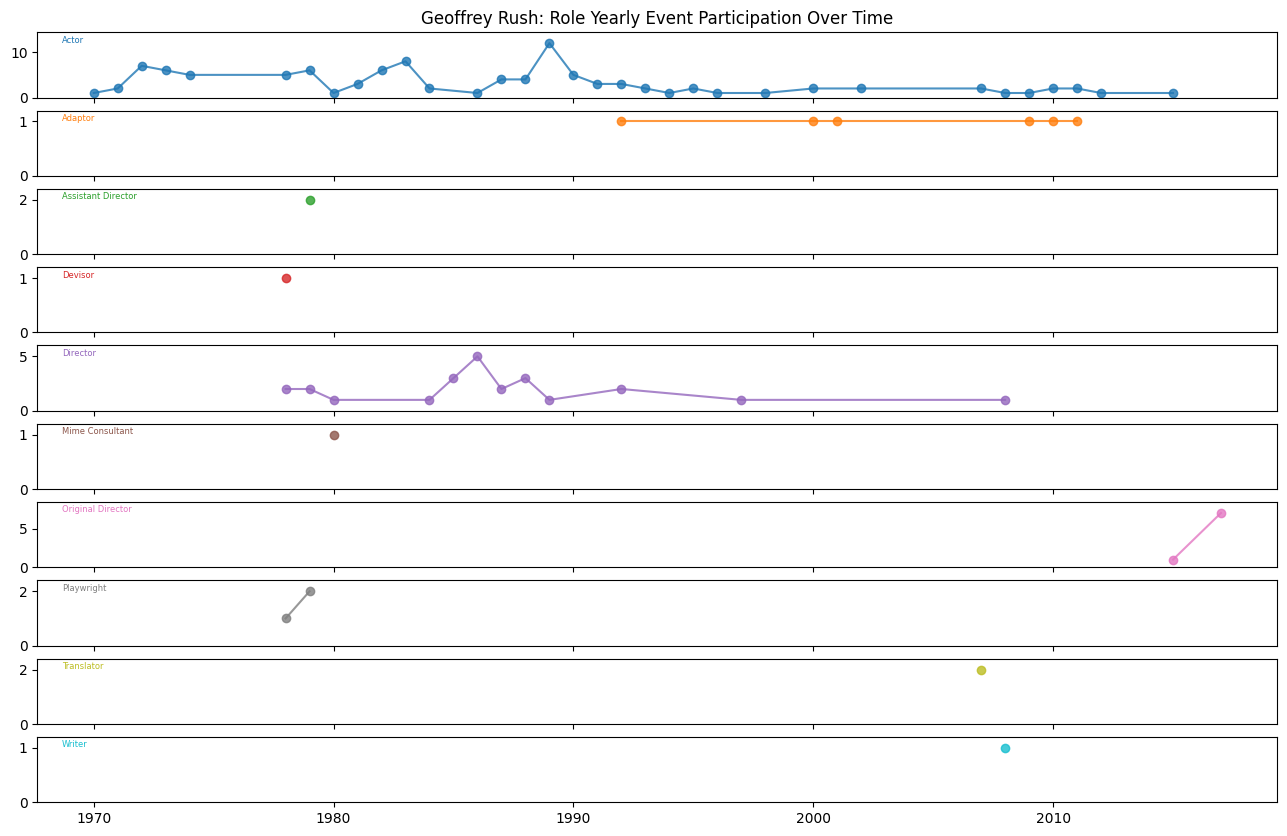

In [923]:
# create subplots for each occupation over time with a shared x-axis
fig, axs = plt.subplots(geoffrey_rush_roles["occupation.title"].nunique(), 1, figsize=(16, 10), sharex=True)

# show line plot of roles over time
axs[0].set_title("Geoffrey Rush: Role Yearly Event Participation Over Time")

# assign each plot a different color
for idx, role in enumerate(geoffrey_rush_roles["occupation.title"].unique()):
    role_data = geoffrey_rush_roles[geoffrey_rush_roles["occupation.title"] == role]
    role_data = role_data.sort_values(by="coverage_range.date_range.date_start.year")
    axs[idx].plot(
        role_data["coverage_range.date_range.date_start.year"].astype(int), role_data["count"], 
        label=role, marker="o", alpha=0.8, color=f"C{idx}"
        )

    # make sure each y-axis starts as 0
    axs[idx].set_ylim(0, role_data["count"].max()*1.2)

    # add role as annoation in toip right
    axs[idx].annotate(role, xy=(0.02, 0.95), xycoords="axes fraction", ha="left", va="top", fontsize=6, color=f"C{idx}")

# make legend horizontal, make font size smaller
plt.show()

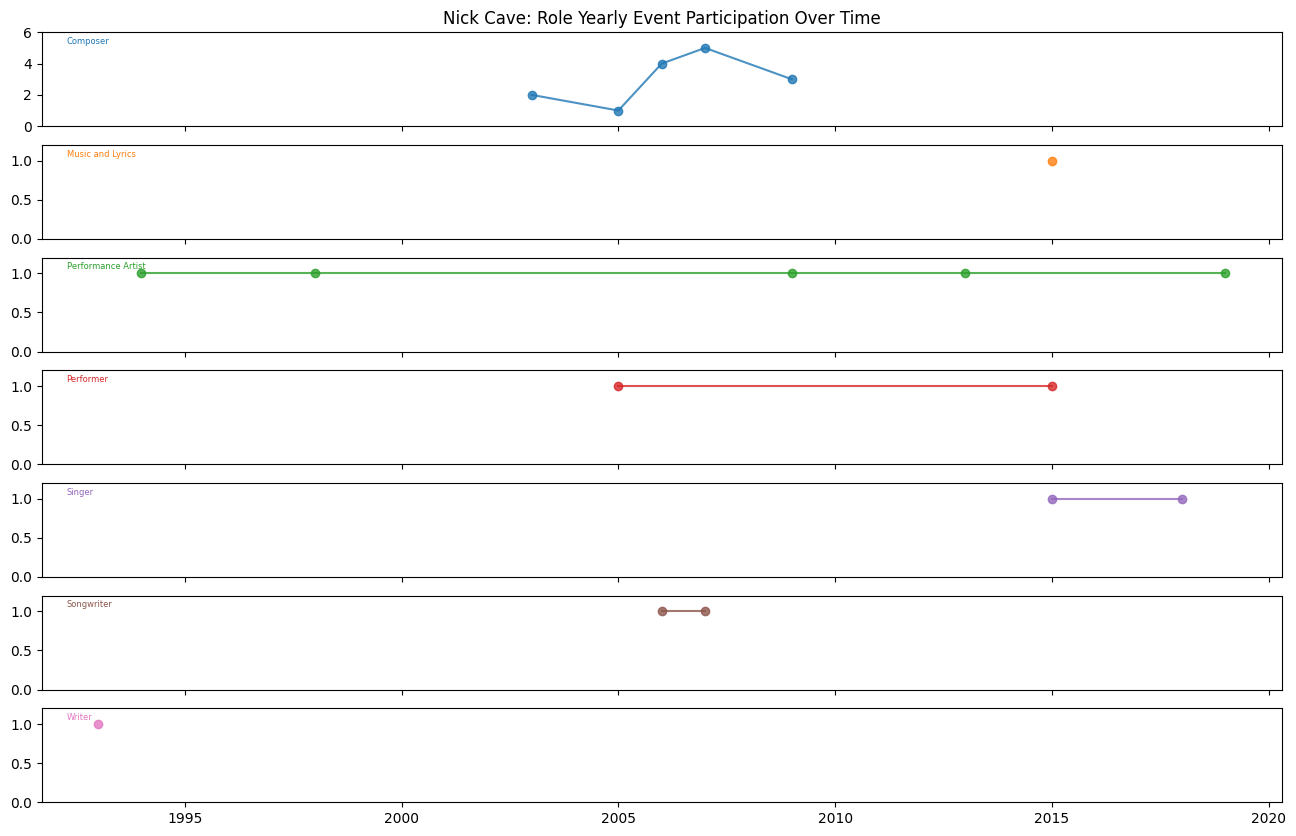

In [924]:
# create subplots for each occupation over time with a shared x-axis
fig, axs = plt.subplots(nick_cave_roles["occupation.title"].nunique(), 1, figsize=(16, 10), sharex=True)

# show line plot of roles over time
axs[0].set_title("Nick Cave: Role Yearly Event Participation Over Time")

# assign each plot a different color
for idx, role in enumerate(nick_cave_roles["occupation.title"].unique()):
    role_data = nick_cave_roles[nick_cave_roles["occupation.title"] == role]
    role_data = role_data.sort_values(by="coverage_range.date_range.date_start.year")
    axs[idx].plot(
        role_data["coverage_range.date_range.date_start.year"].astype(int), role_data["count"], 
        label=role, marker="o", alpha=0.8, color=f"C{idx}"
        )

    # make sure each y-axis starts as 0
    axs[idx].set_ylim(0, role_data["count"].max()*1.2)

    # add role as annoation in toip right
    axs[idx].annotate(role, xy=(0.02, 0.95), xycoords="axes fraction", ha="left", va="top", fontsize=6, color=f"C{idx}")

# make legend horizontal, make font size smaller
plt.show()

In [933]:
john_bell_roles_full["person"] = "John Bell"
geoffrey_rush_roles_full["person"] = "Geoffrey Rush"
nick_cave_roles_full["person"] = "Nick Cave"
pd.concat([john_bell_roles_full, geoffrey_rush_roles_full, nick_cave_roles_full]).to_csv("data/for_nat/john_bell_geoffrey_rush_nick_cave.csv", index=False)

### A bit speculative (any thoughts you have would be great!)
- I want to compare people with more diverse careers (more even spread of roles)
vs. those who specialise, and correlate that with how many events they have. I’m
not sure if that will be possible, we’d have to have some sort of proxy or standard
for diversity e.g. ratio of first (or first three?) roles to other lesser roles? The
theory would be that a large number of events with a high concentration in a
small number of roles leads to a higher likelihood of iconicity compared to people
who are interdisciplinary. Could be a scatter plot, maybe limited to people with
over 25 or over 50 events?

##  Chapter 4 Interleaf
#### Bubble diagram of gender proportion of Archibald winners, local version of what went into the Guardian article

In [195]:
# import matplotlib.pyplot as plt

# # Gender proportions of Archibald winners
# counts = [85.58,14.22]  # values for Archibald winners
# sizes = [count * 150 for count in counts]  # Scale bubble sizes

# plt.figure(figsize=(6,6))
# plt.scatter([0.5, 1], [1, 1], s=sizes, alpha=0.6, color=['tab:orange', 'tab:blue'])
# plt.yticks([])
# plt.xlim(0, 1.5)
# plt.xticks([])
# plt.title("Gender Proportion of Archibald Winners, 1900-2023")

# # Add labels
# plt.text(0.5, 1, f"{str(counts[0])}%", ha='center', va='center', fontsize=10, fontweight='bold')
# plt.text(1, 1, f"{str(counts[1])}%", ha='center', va='center', fontsize=9, fontweight='bold')

# # Add labels above bubbles
# plt.text(0.5, 1.0225, "Males", ha='center', va='center', fontsize=12)
# plt.text(1, 1.012, "Females", ha='center', va='center', fontsize=12)
# plt.show()

# # Gender proportions of Archibald finalists
# counts = [72.34,24.99,2.67]  # values for Archibald winners
# sizes = [count * 150 for count in counts]  # Scale bubble sizes

# plt.figure(figsize=(6,6))
# plt.scatter([0.5, 1.1, 1.5], [1, 1, 1], s=sizes, alpha=0.6, color=['tab:orange', 'tab:blue', 'tab:green'])
# plt.yticks([])
# plt.xlim(0, 2)
# plt.xticks([])
# plt.title("Gender Proportion of Archibald Finalists, 1921-2022")

# # Add labels
# plt.text(0.5, 1, f"{str(counts[0])}%", ha='center', va='center', fontsize=10, fontweight='bold')
# plt.text(1.1, 1, f"{str(counts[1])}%", ha='center', va='center', fontsize=10, fontweight='bold')
# plt.text(1.5, 1, f"{str(counts[2])}%", ha='center', va='center', fontsize=8, fontweight='bold')

# # Add labels above bubbles
# plt.text(0.5, 1.0225, "Males", ha='center', va='center', fontsize=12)
# plt.text(1.1, 1.015, "Females", ha='center', va='center', fontsize=12)
# plt.text(1.5, 1.01, "Unknown", ha='center', va='center', fontsize=11)
# plt.show()

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

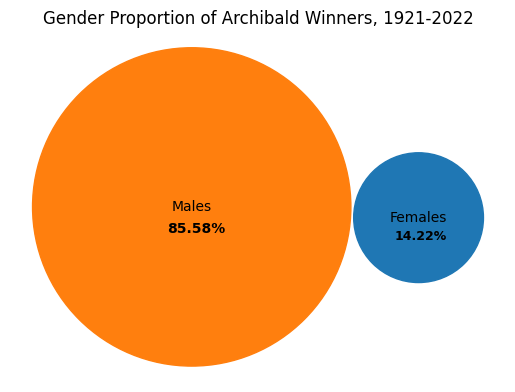

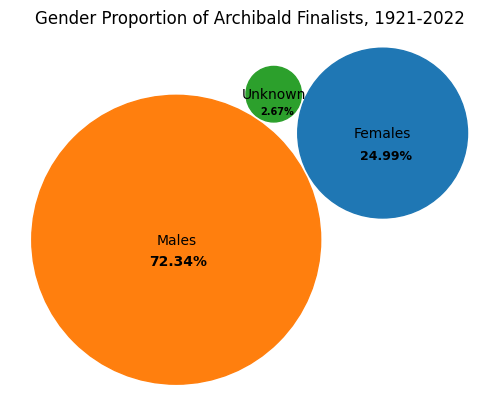

In [194]:
#ADD YOUR DATA HERE
bubble_data = {
    'categories': ['Males', "Females"],
    'props': [85.58,14.22],
    'color': ['tab:orange', 'tab:blue']
}
#STEP 3
bubble_chart = BubbleChart(area=bubble_data['props'],
                           bubble_spacing=0.1)
#STEP 4
bubble_chart.collapse()

#STEP 5

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, bubble_data['categories'], bubble_data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title("Gender Proportion of Archibald Winners, 1921-2022")

# add labels
ax.text(4, 9, f"{bubble_data["props"][0]}%", ha='center', va='center', fontsize=10, fontweight='bold')
ax.text(11.35, 8.75, f"{bubble_data["props"][1]}%", ha='center', va='center', fontsize=9, fontweight='bold')
plt.show()

#############

#ADD YOUR DATA HERE
bubble_data = {
    'categories': ['Males', "Females", "Unknown"],
    'props': [72.34,24.99,2.67],
    'color': ['tab:orange', 'tab:blue', 'tab:green']
}

#STEP 3
bubble_chart = BubbleChart(area=bubble_data['props'],
                           bubble_spacing=0.1)
#STEP 4
bubble_chart.collapse()

#STEP 5

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, bubble_data['categories'], bubble_data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title("Gender Proportion of Archibald Finalists, 1921-2022")

# add labels
ax.text(1.3, 1.75, f"{bubble_data["props"][0]}%", ha='center', va='center', fontsize=10, fontweight='bold')
ax.text(8.2, 5.25, f"{bubble_data["props"][1]}%", ha='center', va='center', fontsize=9, fontweight='bold')
ax.text(4.6, 6.75, f"{bubble_data["props"][2]}%", ha='center', va='center', fontsize=7, fontweight='bold')
plt.show()

## Chapter 3: Narratives and Networks Questions

In [11]:
import requests
import pandas as pd
import io

def fetch_small_data_from_github(fname):
    url = f"https://raw.githubusercontent.com/acd-engine/jupyterbook/master/data/analysis/{fname}"
    response = requests.get(url)
    rawdata = response.content.decode('utf-8')
    return pd.read_csv(io.StringIO(rawdata))

df_detailled = fetch_small_data_from_github('DAAO_AustLit_exactmatches_detailed.csv')

# Clean textual sections
df_detailled['AgentText_Bio'] = df_detailled['AgentText'].apply(lambda x: x\
                                                .split('×Bio changes summary\nClose')[-1]\
                                                .split('Most Referenced Works')[0]\
                                                .replace('\n', ' ')\
                                                .replace('\t', ' ')\
                                                .replace("\'", "")\
                                                .replace("  ", " ")\
                                                .strip() if "×Bio" in x else '')

df_detailled['AgentText_Notes'] = df_detailled['AgentText'].apply(lambda x: x.split('Notes')[-1]\
                                            .split('Last amended')[0]\
                                            .split('Awards for Works')[0]\
                                            .replace('\n', ' ')\
                                            .replace('\t', ' ')\
                                            .replace("\'", "")\
                                            .replace("  ", " ")\
                                            .strip() if "Notes" in x else '')

df_detailled['AgentText_Awards'] = df_detailled['AgentText'].apply(lambda x: x.split('Awards for Works')[-1]\
                                            .split('VIEW ALL AWARDS')[0]\
                                            .replace('\n', ' ')\
                                            .replace('\t', ' ')\
                                            .replace("\'", "")\
                                            .replace("  ", " ")\
                                            .strip() if "Awards for Works" in x else '')

df_detailled['agentWorksBy'] = df_detailled['agentWorksBy'].apply(lambda x: x\
                                                .replace('\nWorks ByPreview all','')\
                                                .replace('\n', ' ')\
                                                .replace('\t', ' ')\
                                                .replace("\'", "")\
                                                .replace("  ", " ")\
                                                .strip())

df_detailled['agentWorksAbout'] = df_detailled['agentWorksAbout'].apply(lambda x: x\
                                                .replace('\nWorks AboutPreview all','')\
                                                .replace('\n', ' ')\
                                                .replace('\t', ' ')\
                                                .replace("\'", "")\
                                                .replace("  ", " ")\
                                                .strip())

df_detailled['agentWorksWorks'] = df_detailled['agentWorksWorks'].apply(lambda x: x\
                                                .replace('\nWorks About Their WorksPreview all','')\
                                                .replace('\n', ' ')\
                                                .replace('\t', ' ')\
                                                .replace("\'", "")\
                                                .replace("  ", " ")\
                                                .strip())

import numpy as np
df_detailled['agentWorksBy_count'] = np.where(df_detailled.agentWorksBy == "", False, True)
df_detailled['agentWorksAbout_count'] = np.where(df_detailled.agentWorksAbout == "", False, True)
df_detailled['agentWorksWorks_count'] = np.where(df_detailled.agentWorksWorks == "", False, True)
df_detailled['AgentText_Awards_count'] = np.where(df_detailled.AgentText_Awards == "", False, True)

#### Top 5 by word count

In [27]:
df_detailled["AgentText_word_count"] = df_detailled["AgentText"].apply(lambda x: len(x.split()))
df_detailled["agentWorksBy_word_count"] = df_detailled["agentWorksBy"].apply(lambda x: len(x.split()))
df_detailled["agentWorksAbout_word_count"] = df_detailled["agentWorksAbout"].apply(lambda x: len(x.split()))
df_detailled["agentWorksWorks_word_count"] = df_detailled["agentWorksWorks"].apply(lambda x: len(x.split()))
df_detailled["AgentText_Bio_word_count"] = df_detailled["AgentText_Bio"].apply(lambda x: len(x.split()))
df_detailled["AgentText_Notes_word_count"] = df_detailled["AgentText_Notes"].apply(lambda x: len(x.split()))
df_detailled["AgentText_Awards_word_count"] = df_detailled["AgentText_Awards"].apply(lambda x: len(x.split()))
df_detailled["total_word_count"] = df_detailled["AgentText_word_count"] + df_detailled["agentWorksBy_word_count"] + df_detailled["agentWorksAbout_word_count"] + df_detailled["agentWorksWorks_word_count"] + df_detailled["AgentText_Bio_word_count"] + df_detailled["AgentText_Notes_word_count"] + df_detailled["AgentText_Awards_word_count"]
df_detailled

display(df_detailled[["FullName","AgentText_word_count"]].sort_values("AgentText_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksBy_word_count"]].sort_values("agentWorksBy_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksAbout_word_count"]].sort_values("agentWorksAbout_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksWorks_word_count"]].sort_values("agentWorksWorks_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Bio_word_count"]].sort_values("AgentText_Bio_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Notes_word_count"]].sort_values("AgentText_Notes_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Awards_word_count"]].sort_values("AgentText_Awards_word_count", ascending=False).head(5))
display(df_detailled[["FullName","total_word_count"]].sort_values("total_word_count", ascending=False).head(5))

,FullName,AgentText_word_count
115,Dusan Marek,1597
125,Archie Moore,1311
65,Fiona Foley,1024
95,Deborah Kelly,961
174,Christian Thompson,957


,FullName,agentWorksBy_word_count
176,Richard Kelly Tipping,10325
10,Bronwyn Bancroft,3943
115,Dusan Marek,3757
8,John Armstrong,3147
76,Barbara Hanrahan,2666


,FullName,agentWorksAbout_word_count
129,Albert Namatjira,4589
76,Barbara Hanrahan,4558
135,Sidney Nolan,4522
67,Donald Friend,2445
141,Margaret Olley,2092


,FullName,agentWorksWorks_word_count
76,Barbara Hanrahan,9071
10,Bronwyn Bancroft,4286
188,Cathy Wilcox,3597
176,Richard Kelly Tipping,2490
67,Donald Friend,1840


,FullName,AgentText_Bio_word_count
115,Dusan Marek,1194
125,Archie Moore,893
174,Christian Thompson,486
76,Barbara Hanrahan,440
135,Sidney Nolan,393


,FullName,AgentText_Notes_word_count
2,Thelma Afford,259
157,Robert Rooney,199
176,Richard Kelly Tipping,112
65,Fiona Foley,92
109,Keith Looby,57


,FullName,AgentText_Awards_word_count
95,Deborah Kelly,471
126,Margaret Morgan,418
1,Ian Abdulla,351
10,Bronwyn Bancroft,305
188,Cathy Wilcox,281


,FullName,total_word_count
76,Barbara Hanrahan,17588
176,Richard Kelly Tipping,15148
10,Bronwyn Bancroft,10211
135,Sidney Nolan,8565
67,Donald Friend,7246


We extend this by looking at unique word counts


In [29]:
df_detailled["AgentText_unique_word_count"] = df_detailled["AgentText"].apply(lambda x: len(set(x.split())))
df_detailled["agentWorksBy_unique_word_count"] = df_detailled["agentWorksBy"].apply(lambda x: len(set(x.split())))
df_detailled["agentWorksAbout_unique_word_count"] = df_detailled["agentWorksAbout"].apply(lambda x: len(set(x.split())))
df_detailled["agentWorksWorks_unique_word_count"] = df_detailled["agentWorksWorks"].apply(lambda x: len(set(x.split())))
df_detailled["AgentText_Bio_unique_word_count"] = df_detailled["AgentText_Bio"].apply(lambda x: len(set(x.split())))
df_detailled["AgentText_Notes_unique_word_count"] = df_detailled["AgentText_Notes"].apply(lambda x: len(set(x.split())))
df_detailled["AgentText_Awards_unique_word_count"] = df_detailled["AgentText_Awards"].apply(lambda x: len(set(x.split())))
df_detailled["total_unique_word_count"] = df_detailled["AgentText_unique_word_count"] + df_detailled["agentWorksBy_unique_word_count"] + df_detailled["agentWorksAbout_unique_word_count"] + df_detailled["agentWorksWorks_unique_word_count"] + df_detailled["AgentText_Bio_unique_word_count"] + df_detailled["AgentText_Notes_unique_word_count"] + df_detailled["AgentText_Awards_unique_word_count"]

display(df_detailled[["FullName","AgentText_unique_word_count"]].sort_values("AgentText_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksBy_unique_word_count"]].sort_values("agentWorksBy_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksAbout_unique_word_count"]].sort_values("agentWorksAbout_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksWorks_unique_word_count"]].sort_values("agentWorksWorks_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Bio_unique_word_count"]].sort_values("AgentText_Bio_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Notes_unique_word_count"]].sort_values("AgentText_Notes_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Awards_unique_word_count"]].sort_values("AgentText_Awards_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","total_unique_word_count"]].sort_values("total_unique_word_count", ascending=False).head(5))

,FullName,AgentText_unique_word_count
115,Dusan Marek,847
125,Archie Moore,730
65,Fiona Foley,595
174,Christian Thompson,567
95,Deborah Kelly,564


,FullName,agentWorksBy_unique_word_count
176,Richard Kelly Tipping,2442
8,John Armstrong,1396
10,Bronwyn Bancroft,1349
115,Dusan Marek,1237
76,Barbara Hanrahan,864


,FullName,agentWorksAbout_unique_word_count
135,Sidney Nolan,1775
129,Albert Namatjira,1744
76,Barbara Hanrahan,1541
67,Donald Friend,1025
141,Margaret Olley,852


,FullName,agentWorksWorks_unique_word_count
76,Barbara Hanrahan,1899
10,Bronwyn Bancroft,936
126,Margaret Morgan,728
176,Richard Kelly Tipping,687
188,Cathy Wilcox,584


,FullName,AgentText_Bio_unique_word_count
115,Dusan Marek,606
125,Archie Moore,484
174,Christian Thompson,291
76,Barbara Hanrahan,253
135,Sidney Nolan,245


,FullName,AgentText_Notes_unique_word_count
157,Robert Rooney,148
2,Thelma Afford,144
176,Richard Kelly Tipping,90
65,Fiona Foley,76
109,Keith Looby,42


,FullName,AgentText_Awards_unique_word_count
95,Deborah Kelly,277
126,Margaret Morgan,243
188,Cathy Wilcox,187
70,George Gittoes,186
1,Ian Abdulla,154


,FullName,total_unique_word_count
76,Barbara Hanrahan,5063
176,Richard Kelly Tipping,4409
135,Sidney Nolan,3462
10,Bronwyn Bancroft,3324
67,Donald Friend,3170


#### Is there a way of visualising the 194 who appear as an exact match between AustLit and the DAAO in relation to the DAAO's Associates entity - i.e. to show that this match might be about who those 194 are associated with rather than just weather they are both writer and artist?

In [90]:
acde_people = pd.read_csv("data/acde_person.csv")
daao_people = acde_people[acde_people["data_source"].str.contains("DAAO")]
austlit_daao500 = daao_people[daao_people.display_name.str.replace('"','').isin(df_detailled.FullName)]

/var/folders/gm/qd1sm1x551zf2qwxk06w8wpw0000gn/T/ipykernel_71656/2752394424.py:1: DtypeWarning: Columns (4,5,9,11,12,14,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,56,57,58,59,60,61,63,66) have mixed types. Specify dtype option on import or set low_memory=False.
  acde_people = pd.read_csv("data/acde_person.csv")


In [94]:
import json
# identify artists with related people
frame_related_people = austlit_daao500[austlit_daao500.related_people.notnull()]
austlit_daao_links = frame_related_people[frame_related_people.related_people != 0]["display_name"].tolist()

frame_related_people["ori_dbid"] = frame_related_people["ori_dbid"].apply(lambda x: ast.literal_eval(x)["$oid"])

# for each KMN-DAAO match, fetch related people data
related_records = pd.DataFrame()
for daao_link in austlit_daao_links:
    this_artist = frame_related_people[frame_related_people["display_name"] == daao_link].iloc[0]
    data = pd.DataFrame(json.loads(str(this_artist["related_people"])))
    data["Artist"] = this_artist["display_name"]
    data["oid"] = this_artist["ori_dbid"]
    related_records = pd.concat([related_records, data])

# add predicate column
predicate = []
related_person_oid = []
for _,row in related_records.iterrows():
    if row["subject"]["label"] == row["Artist"].replace('"', ''):
        predicate.append(row.get("predicate", {}).get("term", "associate of"))
        related_person_oid.append(row["object"].get("ori_dbid", {}).get("$oid", np.nan))
    else:
        predicate.append(row.get("predicate", {}).get("reverse_term", "associate of"))
        related_person_oid.append(row["subject"].get("ori_dbid", {}).get("$oid", np.nan))

related_records["predicate"] = predicate
related_records["related_person_oid"] = related_person_oid
related_records = related_records[["Artist","oid","related_person_oid","predicate"]].drop_duplicates()

/var/folders/gm/qd1sm1x551zf2qwxk06w8wpw0000gn/T/ipykernel_71656/443321455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_related_people["ori_dbid"] = frame_related_people["ori_dbid"].apply(lambda x: ast.literal_eval(x)["$oid"])


In [123]:
related_links = related_records["related_person_oid"].tolist()
daao_people["oid"] = daao_people["ori_dbid"].apply(lambda x: ast.literal_eval(x)["$oid"])

# for each KMN-DAAO match, fetch related people data
related_records2 = pd.DataFrame()
for daao_link2 in related_links:
    this_artist = daao_people[daao_people["oid"] == daao_link2].iloc[0]
    data = pd.DataFrame(json.loads(str(this_artist["related_people"])))
    data["Related_Artist"] = this_artist["display_name"]
    data["related_person_oid"] = this_artist["oid"]
    related_records2 = pd.concat([related_records2, data])

/var/folders/gm/qd1sm1x551zf2qwxk06w8wpw0000gn/T/ipykernel_71656/2790395884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daao_people["oid"] = daao_people["ori_dbid"].apply(lambda x: ast.literal_eval(x)["$oid"])


In [139]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
import json
import pandas as pd

# create a network graph of frame_records_withname where there are two types of nodes: Artist and display_name
# and the edges are the relationships between them which is the predicate column
%matplotlib inline

related_records["influential"] = np.where(related_records["related_person_oid"].isin(related_records2.related_person_oid.value_counts().head(9).index.values), True, False)
related_records_influential = pd.merge(related_records[related_records["influential"]], related_records2[["Related_Artist","related_person_oid"]], on="related_person_oid", how="left")
# related_records.influential.value_counts()

G = nx.from_pandas_edgelist(related_records_influential, source='Artist', target='Related_Artist', edge_attr='predicate')

# show edges
edge_labels = nx.get_edge_attributes(G, 'predicate')
pos = nx.spring_layout(G, seed=42, k=0.15)

# make colour dependent on gender
colors = []
for node in G.nodes():
    node_artist_frame = related_records_influential[related_records_influential.Artist == node]
    node_related_frame = related_records_influential[related_records_influential.Related_Artist == node]

    if node_artist_frame.shape[0] > 0:
        colors.append('tab:green')
    else:
        colors.append('tab:orange')

nx.draw(G, pos, with_labels=True, node_size=80, font_size=3, node_color=colors)
plt.savefig('images/austlit-relatedpeople-intersect-network-influence100.png', dpi=500)


In [145]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
import json
import pandas as pd

# create a network graph of frame_records_withname where there are two types of nodes: Artist and display_name
# and the edges are the relationships between them which is the predicate column
%matplotlib inline

related_records["influential"] = np.where(related_records["related_person_oid"].isin(related_records2.related_person_oid.value_counts().head(20).index.values), True, False)
related_records_influential = pd.merge(related_records[related_records["influential"]], related_records2[["Related_Artist","related_person_oid"]], on="related_person_oid", how="left")
# related_records.influential.value_counts()

G = nx.from_pandas_edgelist(related_records_influential, source='Artist', target='Related_Artist', edge_attr='predicate')

# show edges
edge_labels = nx.get_edge_attributes(G, 'predicate')
pos = nx.spring_layout(G, seed=42, k=0.15)

# make colour dependent on gender
colors = []
for node in G.nodes():
    node_artist_frame = related_records_influential[related_records_influential.Artist == node]
    node_related_frame = related_records_influential[related_records_influential.Related_Artist == node]

    if node_artist_frame.shape[0] > 0:
        colors.append('tab:green')
    else:
        colors.append('tab:orange')

nx.draw(G, pos, with_labels=True, node_size=80, font_size=3, node_color=colors)
plt.savefig('images/austlit-relatedpeople-intersect-network-influence70.png', dpi=500)


In [150]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
import json
import pandas as pd

# create a network graph of frame_records_withname where there are two types of nodes: Artist and display_name
# and the edges are the relationships between them which is the predicate column
%matplotlib inline

related_records["influential"] = np.where(related_records["related_person_oid"].isin(related_records2.related_person_oid.value_counts().head(48).index.values), True, False)
related_records_influential = pd.merge(related_records[related_records["influential"]], related_records2[["Related_Artist","related_person_oid"]], on="related_person_oid", how="left")
# related_records.influential.value_counts()

G = nx.from_pandas_edgelist(related_records_influential, source='Artist', target='Related_Artist', edge_attr='predicate')

# show edges
edge_labels = nx.get_edge_attributes(G, 'predicate')
pos = nx.spring_layout(G, seed=42, k=0.15)

# make colour dependent on gender
colors = []
for node in G.nodes():
    node_artist_frame = related_records_influential[related_records_influential.Artist == node]
    node_related_frame = related_records_influential[related_records_influential.Related_Artist == node]

    if node_artist_frame.shape[0] > 0:
        colors.append('tab:green')
    else:
        colors.append('tab:orange')

nx.draw(G, pos, with_labels=True, node_size=80, font_size=3, node_color=colors)
plt.savefig('images/austlit-relatedpeople-intersect-network-influence50.png', dpi=500)
